# Deep Q Learning - Invatare Q profunda

## Introducere
In documentul anterior am prezentat utilitatea algoritmului de Q Learning pentru antrenarea unui model in efectuarea unei sarcini.

O slabiciune majora pe care a avut-o implementarea anterioara a fost utilizarea unei matrici multi-demensionale pentru stocarea valorilor Q. 
In practica, este foarte greu sa reprezentam o multitudine de valori ale unei stari ( in special in cazul numerelor reale care trebuiesc discretizate ).

**De asemenea, matricea ocupa foarte mult spatiu atat pentru stocare cat si pentru evaluarea sa in memorie**

Pentru a evita aceasta problema, o solutie este sa folosim functii de aproximare a stari. Vrem sa avem niste generatori care sa ne ofere stari pentru tot spatiul disponibil, astfel putem salva extrem de mult spatiu si oferindu-ne o flexibilitate extraordinara. In cazul matrici, pentru accesarea valorii Q foloseam pozitia sa in matrice; 
in cazul acestor functii de aproximare, accesarea se va face prin evaluarea unei functii ( actiune pe care o vom numii **predictie** ).

Aceste functii de aproximare au fost inspirate dupa un model biologic: *neuronul*.

![model](https://miro.medium.com/max/1600/1*JVm4m33dGS1-dxsAh_H4QA.png) 

![model](https://upload.wikimedia.org/wikipedia/commons/4/44/Neuron3.png)


## Structura

### Perceptron

Pentru a ne crea o mica intuitie asupra acestor retele neuronale vom discuta de ce mai simpla retea neuronala: Perceptron

Un model simplu de perceptron ar fi:

$$y = f(w * x + b), unde \, x\in R, y\in R, w\in R, b\in R, f\in C^1$$

|Notatie| Denumire |Semnificatie
| :---: | :---: | --- |
| x | Intrarea (Input) | Valoarea/Semnal de intrarea |
| w | Puterea semnalului (Weight) | Aceasta valoare stabileste importanta valorii de intrare in retea |
| b | Interferenta/Element neutru (Bias) | Acesta ajuta la mai buna adjustare a aproximarii |
| f | Functie de activare (Activation function) | Functie care filtreaza semnalul | 
| y | Iesire (Output) | Valoarea/semnal de iesire |

**Observatie**: Daca functie de activarea este cea de identitate, vom avea: $y = w * x + b$ care seamana cu ecuatia de gradul I. Practic, perceptron-ul descrie o dreapta. Iar folosirea si antrenarea acestui model pentru aproximare ar fi similar cu gasirea unei drepte care sa aproximeze cel mai bine o multime de puncte. Daca dorim sa avem 2 iesiri, trebuie sa mai adaugam un perceptron ( cei 2 perceptroni formeaza impreuna un `strat`)

**Important**: Gasirea unor valori pentru `w` si `b` astfel incat aproximarea sa fie cat mai buna se numeste **antrenare (fit)**.

Si pornind de ala aceasta baza, putem adauga mai multe intrari: $y = f(w_1 * x_1 + w_2 * x_2 + b)$ - formula folosita in clasificarea obiectelor cu 2 trasaturi ( se poate gasii o dreapta care sa desparta doua multimii cu aproximatie )
![model](https://uploads.toptal.io/blog/image/330/toptal-blog-image-1395721394410.png)

### Functia de activare

Dupa cum aproximarii obervat anterior, folosind o functia de identitate, perceptron-ul face o aproximare liniara, cea ce in multe cazuri nu este foarte de folos, mai ales daca problema pe care vrem s-o rezolvam necesita o aproximare non-liniara.

De asemenea, este important si conceptul de filtrare: daca dorim ca reteaua sa determine un raspuns care poate adevarat sau fals pentru un set de intrare, ar trebuii ca reteaua sa afiseze un semnal de tip 0 (fals) sau 1 (adevarat).
Si aici incepe si magia, practic reteaua neuronala prin antrenare va incerca sa gaseasca valori pentru `w ` si `b` astfel incat valoarea semnalului sa treaca sau nu de filtru pentru setul de date de intrare. 

Exemplu: Dandu-se greutatea si inaltimea unui leu, vrem ca reteaua sa determine sexul leului: 0 (mascul) si 1 (femela). Iar pentru a determina acest lucru vom folosim un perceptron cu 2 intrari. Dilema este cum interpretam rezultatul. Rezultatul perceptronului este o valoare reala, iar raspunsul pe care trebuie sa-l dam este unul de tip binar. Aici isi justifica existenta functia de activare, si anume daca folosim functia treapta unitate (Heaviside), valorile negative vor fi asociate cu 0, iar cele pozitive cu 1. Prin urmare, in procedeul de antrenare, perceptronul se va calibra astfel incat sa ofere o valoare pozitiva cand va primi date carateristice unei femele si negativa in cazul masculului.

**Pentru reteaua din acest exemplu, vom folosii functiile de activare: `linear` si `ReLU`**

![](https://i.ytimg.com/vi/sJKmcd8fjAE/maxresdefault.jpg)



### Retele

Datele de intrare vor formar **stratul de intrare (input layer)**
Datele de iesire vor forma **stratul de iesire (output layer)**
Daca folosim mai multi perceptroni, spunem ca avem un **strat ascuns (hidden layer)**. 

**Observatie**: Perceptroni pot fi la randul lor un node de intrare sau iesire pentru semnal, acet lucru se intampla cand avem mai mult de un `strat ascuns`.

![model](http://www.xincoder.com/blogs/neural_network/nn.png)





![mode](https://ars.els-cdn.com/content/image/3-s2.0-B9781907568992500025-f02-02-9781907568992.jpg)





### Modele de retele

### Modelul pe care il vom folosii este cel de Deep Feed Forward Neural Network

![model](https://miro.medium.com/max/4000/1*cuTSPlTq0a_327iTPJyD-Q.png)


### Optimizatori

Antrenarea efectiva a retelei se face folosind algoritm de optmizare. Acesta este posibil cel mai complex si intensiv capitol al retelelor neuronale, nu voi descrie algoritmi, iar o introducere o puteti gasii [aici](https://www.kdnuggets.com/2020/12/optimization-algorithms-neural-networks.html)

Pentru acest model, se va folosii optimizatorul `Adam`

## Unelte

Contruirea unei retele neuronale de la 0 este foarte grea, in special implementarea algoritmilor de optimizare. In practica, se folosec niste librarii cu functii deja implementate si suport hardware pentru calcul rapid care cuprind toate optiunile discutate anterior ( si multe altele ), astfel crearea unei retele se poate face doar in cateva linii de cod.

In aceste exemplu, se va folosii libraria [Tensorflow](https://www.tensorflow.org) cu frameworkul [Keras](https://keras.io)

## Limitari

Cea mai puternica limitare pentru acest solutie in vederea stocari valorlor Q este timpul. Antrenarea unei retele neuronale dureaza foarte mult timp comparat cu metoda matricii din exemplul trecut.

**In modelul trecut, 12.000 de rulari de efectuau in 5-8 min. In acest model, dabia 1.000 de rulari se fac in 2 - 3 ore. C-am acesta este pretul platit pentru puternica flexibilitate pe care ne ofera o retea neuronala.**

In [1]:
import numpy as np
from tensorflow import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import copy
import time
from collections import deque 
import random
%matplotlib inline

# setari pentru tensorflow in vederea utilizarii placii video
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [2]:
class Car:
  def __init__(self, position, direction, turn_rate, speed):
    self.pos = position.astype(np.float64)
    self.dir = direction
    self.turn_rate = turn_rate
    self.speed = speed
  
  # calculez noua pozitia in functia de actiunea data
  def apply_action(self, action):
    # print(f"Actiune: {action}")
    if action == 2:
      # print("Viraj la dreapta")
      self.dir += self.turn_rate
      if self.dir >= 360:
        self.dir = self.dir - 360
    elif action == 1:
      # print("Viraj la stanga")
      self.dir -= self.turn_rate
      if self.dir < 0:
        self.dir = 360 - self.dir 

    self.pos = self.pos + self.get_vector_direction() * self.speed

  # calculez vectorul de directie
  def get_vector_direction(self):
    return np.array([ np.cos(np.deg2rad(self.dir)) ,  np.sin(np.deg2rad(self.dir))])
  
  # returnez pozitia actuala si vectorul de directie
  def observe(self):
    return self.pos, self.get_vector_direction()

  def __str__(self):
    return f"Pos: {self.pos}, Dir: {self.dir}"

In [3]:

class Env:
    def __init__(self):
        # Datele problemei
        self.car_speed = 5 # viteza masinii
        self.turn_rate = 45 # rata de intoarcere
        self.max_distance = 200 # distanta maxima posibila
        self.car_position = np.array([90, 90]) # positia 2D a masinii
        self.location_position = np.array([0, 0]) # positia 2D a locatiei
        self.location_size = 13 # raza locatiei

        # Definirea spatiilor
        self.action_space = [0, 1, 2] # [pastreaza_directia, viraj_stanga, viraj_dreapta]
        self.observation_space_dimension = (1, 2)

        self.car = Car(position=np.copy(self.car_position), direction=0, turn_rate=self.turn_rate, speed=self.car_speed) # obiectul masina a caror miscari vor fi stabilite de agent
        self.max_iterations = 120 # numar maxim de mutari in care agentul trebuie sa rezolve problema
        self.current_iteration = 0 # mutarea curenta
        self.past_positions = [[],[]] # pozitiile prin care a trecut masina
        
    # resetez mediul
    def reset(self):
        self.car_speed = 5 # viteza masinii
        self.turn_rate = 45 # rata de intoarcere
        self.max_distance = 200 # distanta maxima posibila
        self.car_position = np.array([90, 90]) # positia 2D a masinii
        self.location_position = np.array([0, 0]) # positia 2D a locatiei
        self.location_size = 13 # raza locatiei

        self.action_space = [0, 1, 2] # [pastreaza_directia, viraj_stanga, viraj_dreapta]
        self.observation_space_dimension = (1, 2)

        self.car = Car(position=np.copy(self.car_position), direction=0, turn_rate=self.turn_rate, speed=self.car_speed)
        self.max_iterations = 50
        self.current_iteration = 0
        self.past_positions = [[],[]]

        return self.__compute_observation_state()

    # aplic actiunea data de agent si calculez urmatoare stare, recompensa, daca este posibila o viitoare actiune, informatii legate de masina
    def step(self, action):
        self._apply_action(action)
        return self.__compute_observation_state(), self._compute_reward(), self._is_done(), self.get_info()

    # afisez un grafic cu traseul masinii
    def render(self):
        fig, (position_plot) = plt.subplots(1)
        fig.set_figheight(20)
        fig.set_figwidth(20)

        xs, ys = self.get_info()["distances"]

        position_plot.scatter(xs, ys, label="pozitie parcursa de masina")
        position_plot.scatter(self.location_position[0], self.location_position[1], s=self.location_size * 300, alpha=0.7)
        position_plot.axis([-self.max_distance, self.max_distance, -self.max_distance, self.max_distance])
        position_plot.set_aspect('equal', 'box')
        position_plot.grid()
        position_plot.set_xlabel('X')
        position_plot.set_ylabel('Y')
        position_plot.legend()
        position_plot.set_title('Exemplu de episod optim')
        plt.show()
        return fig

    # preiau informatii despre masina
    def get_info(self):
        xs = self.past_positions[0]
        ys = self.past_positions[1]

        return { "distances": (xs, ys) } 
    
    # salvare graficul
    def save_render(self):
        fig = self.render()
        fig.savefig('best_exemplu.png')

    # calculez stare in care se afla masinia
    def __compute_observation_state(self):
        car_position, car_vector_direction = self.car.observe()
        # print(car_vector_direction)
        return (np.array(
            [ self.__compute_distance_to_location_from(car_position) / self.max_distance,
            self.__compute_angle_to_location_from( car_position, car_vector_direction ) / np.pi ])).reshape(self.observation_space_dimension)

    # calculez distanta de la masina pana la locatie
    def __compute_distance_to_location_from(self, car_position):
        return np.linalg.norm(self.location_position - car_position)

    # calculez unghiul dintre locatie si directia masinii
    def __compute_angle_to_location_from(self, car_position, car_direction):
        vector_to_location = self.location_position - car_position
        value = np.clip(np.dot(car_direction, vector_to_location) / ( np.linalg.norm(car_direction) * np.linalg.norm( vector_to_location) ) ,a_min=1, a_max=-1)
        return np.arccos( value )

    # calculez recompensa
    def _compute_reward(self):
        car_position, _ = self.car.observe()
        current_distance = self.__compute_distance_to_location_from(car_position)
        if current_distance < self.location_size:
            return 100
        elif current_distance > self.max_distance:
            return -100
        return -1
    
    # vad ca mai sunt posibile viitoare miscari
    def _is_done(self):
        car_position, _ = self.car.observe()
        current_distance = self.__compute_distance_to_location_from(car_position)

        if self.current_iteration >= self.max_iterations:
            return True
        elif current_distance < self.location_size:
            return True
        elif current_distance > self.max_distance:
            return True

        return False

    # trimit actiunea data de agent catre masina
    def _apply_action(self, action):
        self.car.apply_action(action)
        self.current_iteration += 1

        (x, y), _ = self.car.observe()
        # x,y = car_position
        self.past_positions[0].append(x)
        self.past_positions[1].append(y)



In [4]:
class DQNAgent:
    def __init__(self, state_dim, action_dim):
        # dimensiuni date intrare si iesire
        self.state_dim = state_dim
        self.action_dim = action_dim

        # valori necesare pentru aglortmul de Q Learning 
        self.discount = 0.95
        self.epsilon = 1.0
        self.epsilon_decay = 0.995
        self.epsilon_min = 0.01
        self.learning_rate = 0.001

        # memorie in care stochez actiuninile deja petrecute si valorile sale
        self.memory = deque(maxlen=2000)

        # Creez o retea neuronala
        self.model = keras.models.Sequential()
        self.model.add(keras.layers.InputLayer(batch_input_shape=state_dim)) # Stral de intrare
        self.model.add(keras.layers.Dense(15, activation='relu')) # Primul stat ascuns, format din 15 neuroni si functia de activare ReLU
        self.model.add(keras.layers.Dense(15, activation='relu')) # Al doilea stat ascuns, format din 15 neuroni si functia de activare ReLU
        self.model.add(keras.layers.Dense(action_dim, activation='linear')) # Stratul de iesire cu un filtru liniar
        # Creez modelul si adaug Optimizatorul Adam, iar pierderile for fi calculate cu metoda celor mai mic patrate
        self.model.compile(loss='mse', optimizer=keras.optimizers.Adam(learning_rate=self.learning_rate), metrics=['mae']) 
    
    # adauga experienta in memorie
    def memorize(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))
    
    # calculea actiunea in functie de starea curenta a masinii
    def get_action(self, state):
        if np.random.rand() <= self.epsilon:
            return np.random.randint(0, self.action_dim)
        actions_values = self.model.predict(state)[0]
        return np.argmax(actions_values)

    # antreneaza reateaua folosind un numar aleatoriu de experiente din memorie
    def replay(self, batch_size):
        minibatch = random.sample(self.memory, np.min([len(self.memory), batch_size]))
        for state, action, reward, next_state, done in minibatch:
            target_value = reward
            if not done:
                max_action_value = np.max(self.model.predict(state)[0])
                target_value = reward + self.discount * max_action_value
            target_actions_values = self.model.predict(state)
            target_actions_values[0][action] = target_value
            self.model.fit(state, target_actions_values, epochs=1, verbose=0)
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay



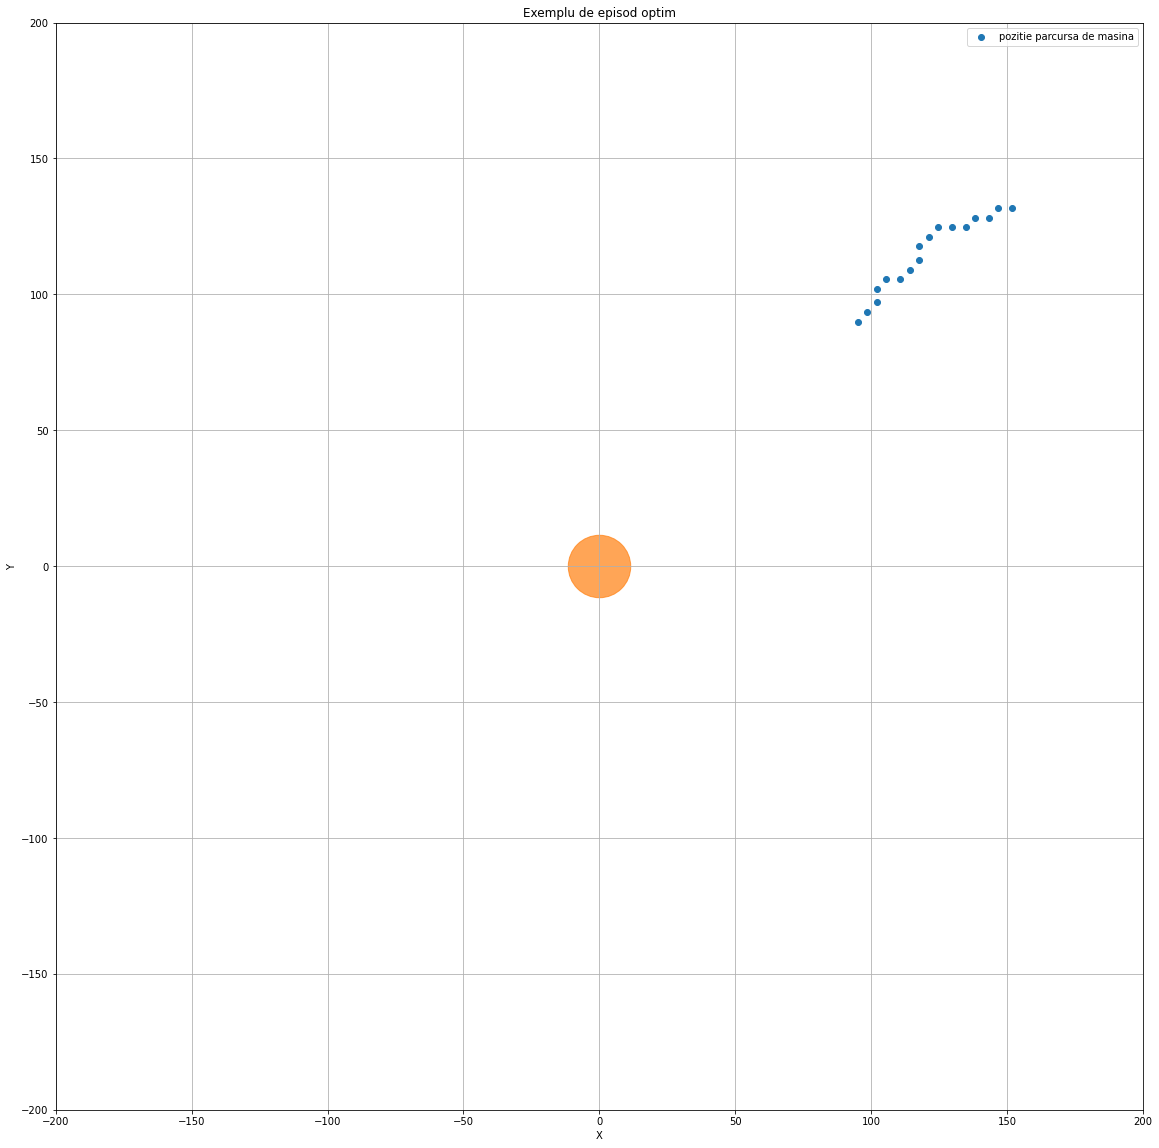

Elapsed 3.777 seconds. Eps: 0. Average Time: 3.777 seconds. Average Reward: -116.000. Max Reward: -116.000 Time: 10:46:25


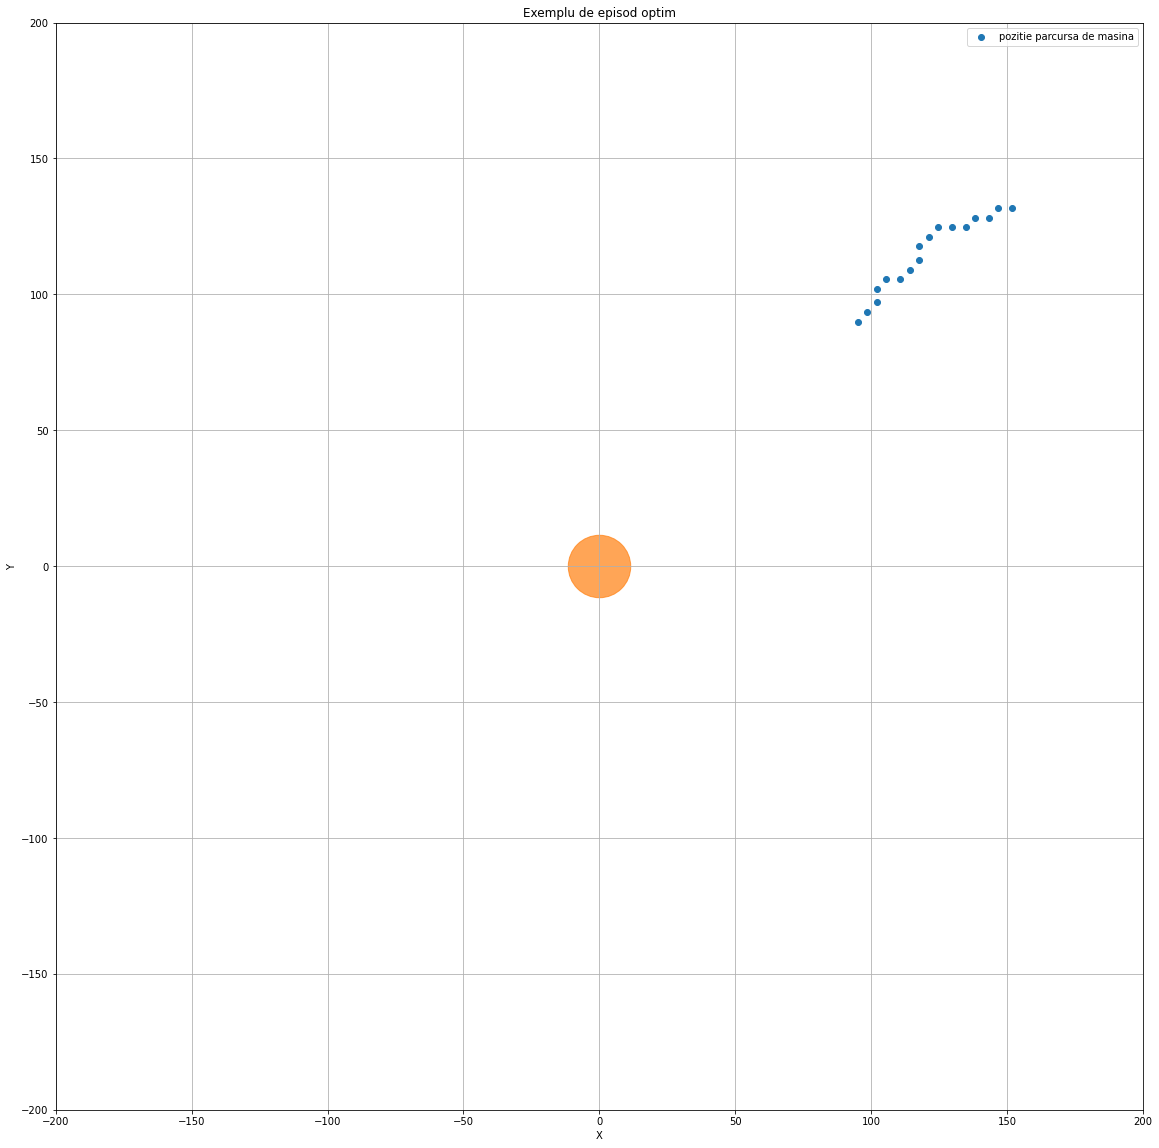

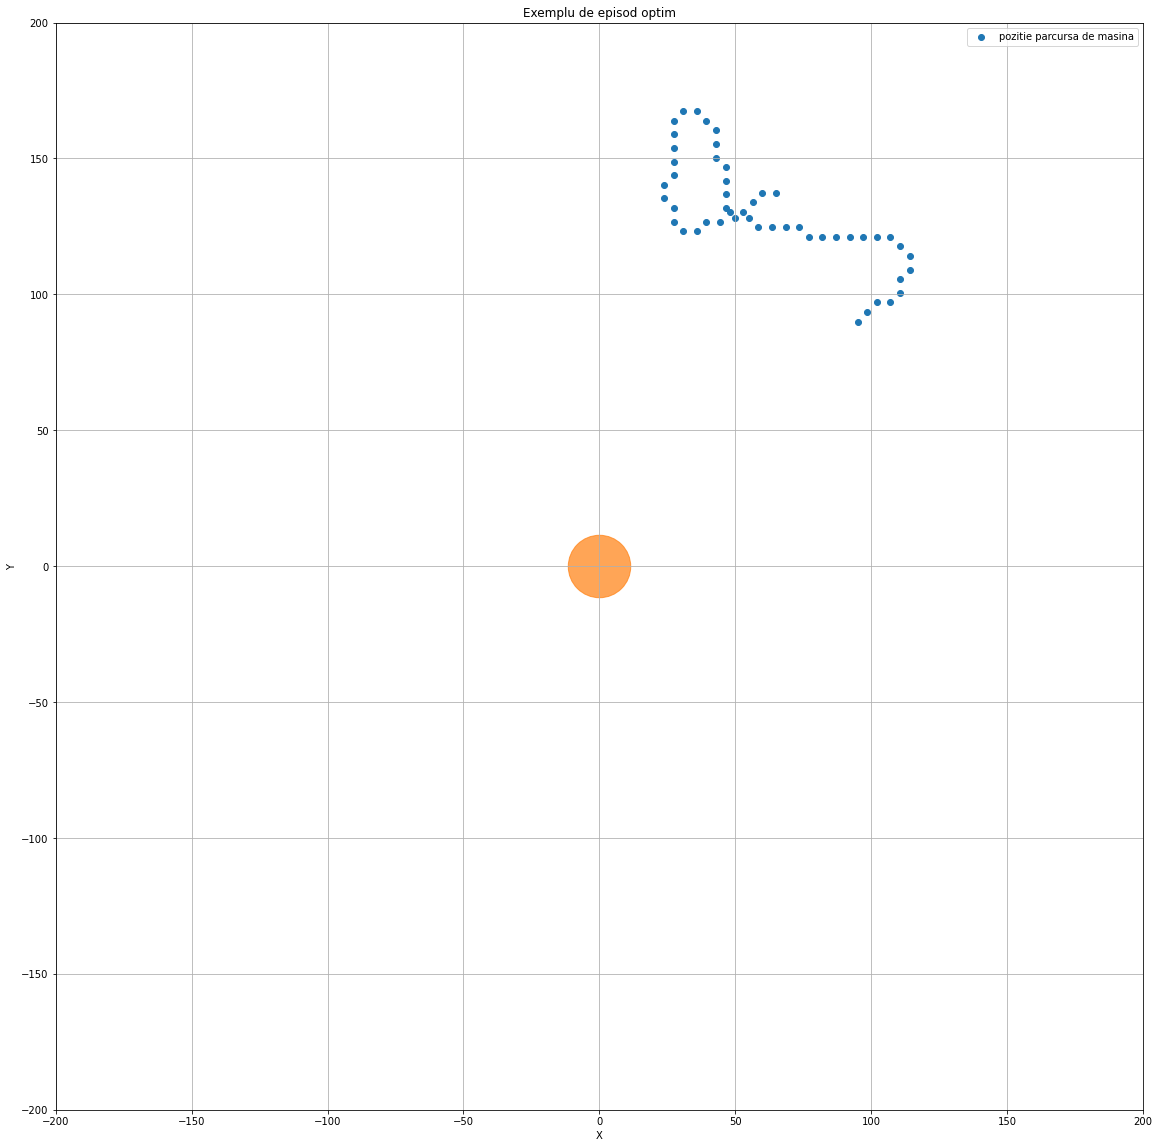

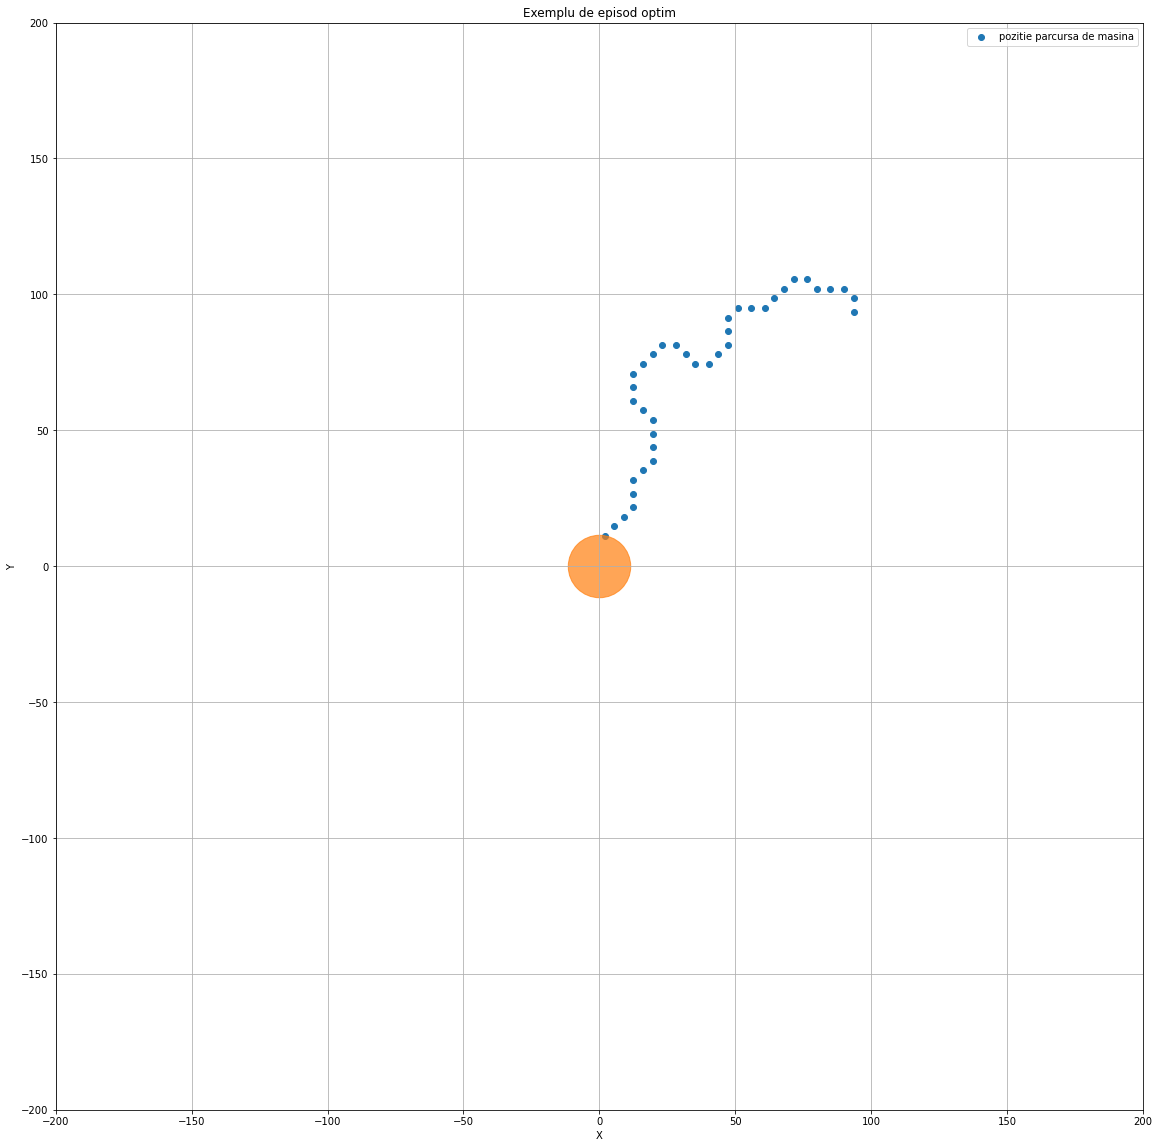

Elapsed 5.132 seconds. Eps: 50. Average Time: 5.482 seconds. Average Reward: -99.667. Max Reward: 63.000 Time: 10:51:02


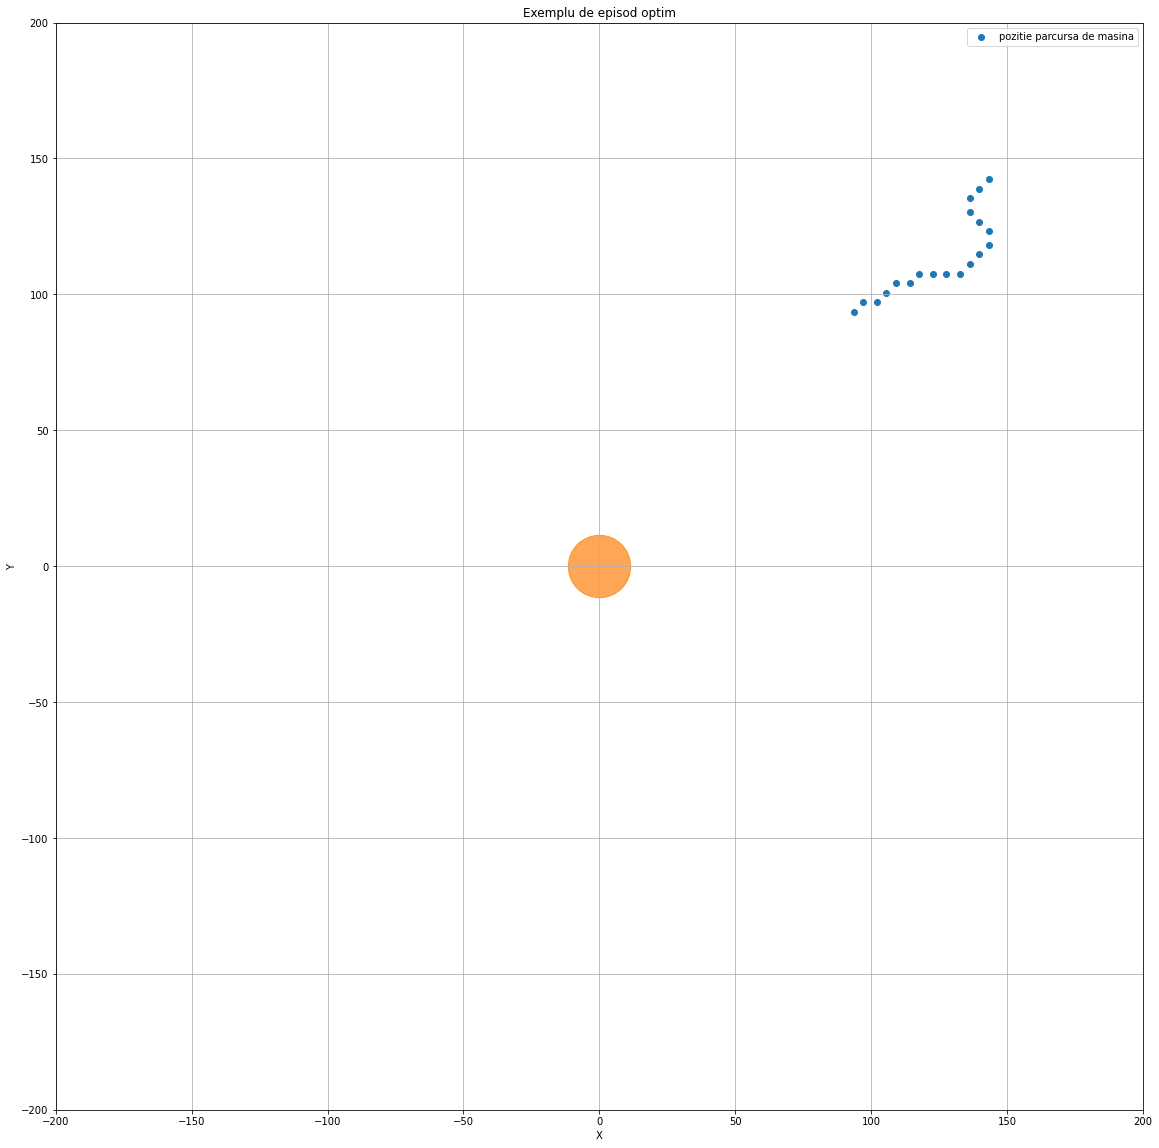

Elapsed 5.767 seconds. Eps: 100. Average Time: 5.675 seconds. Average Reward: -98.376. Max Reward: 63.000 Time: 10:55:56


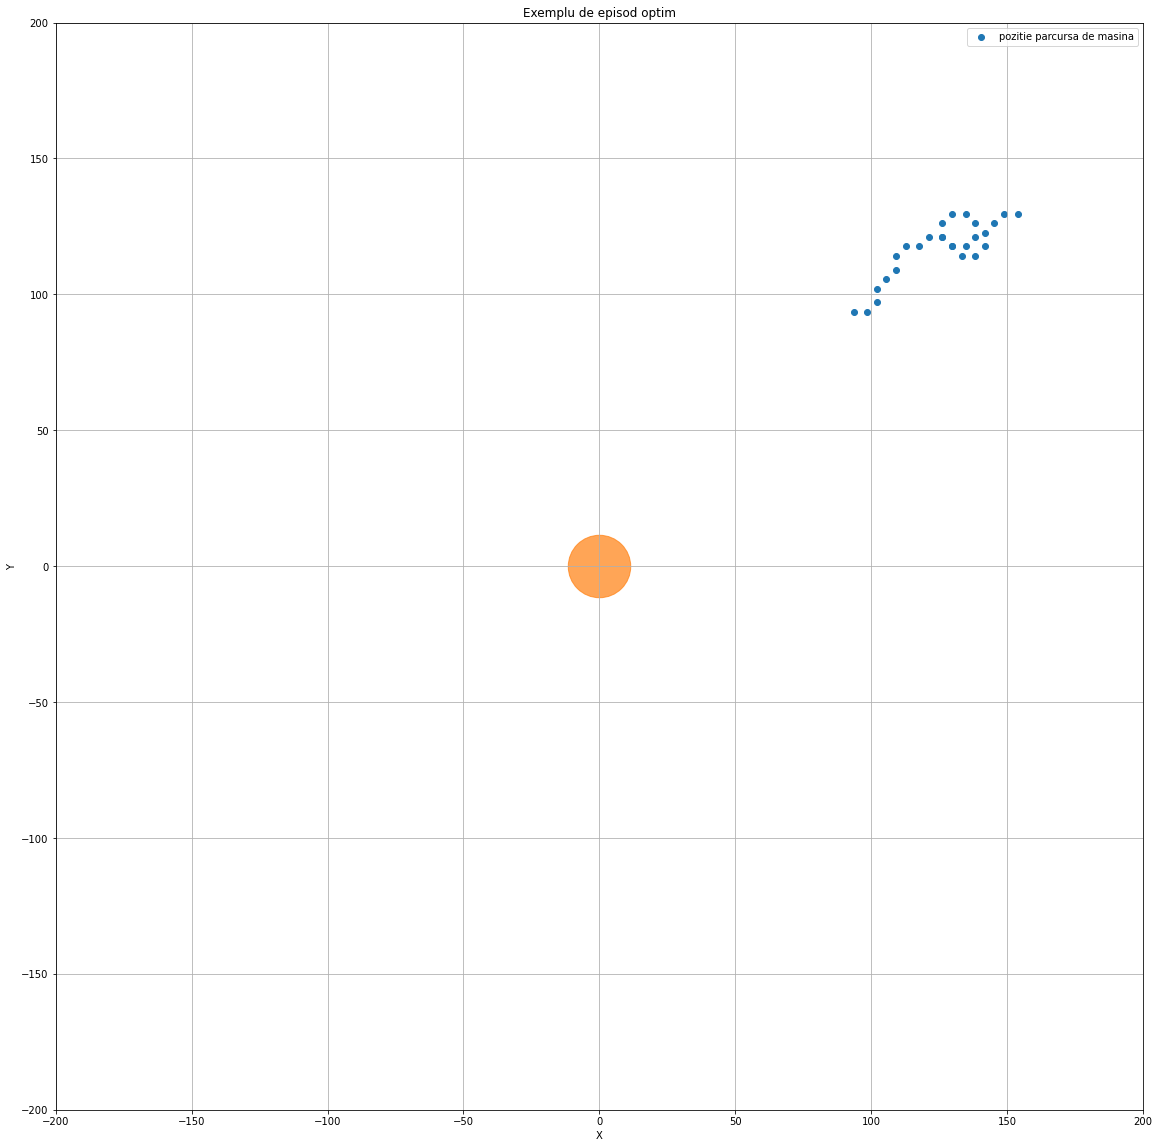

Elapsed 6.496 seconds. Eps: 150. Average Time: 5.899 seconds. Average Reward: -89.735. Max Reward: 63.000 Time: 11:01:14


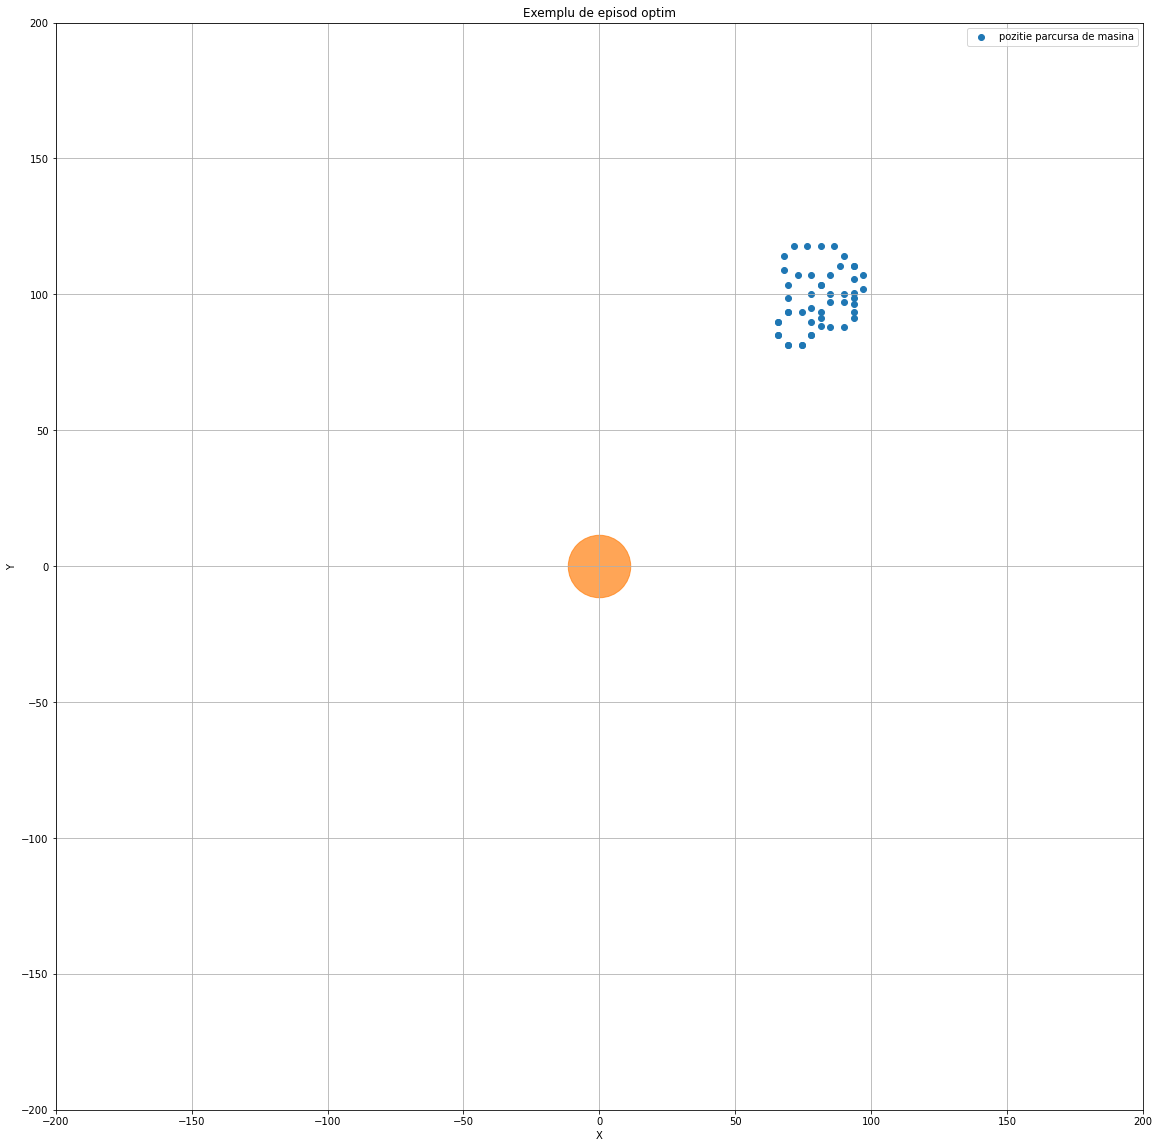

Elapsed 6.660 seconds. Eps: 200. Average Time: 6.146 seconds. Average Reward: -80.776. Max Reward: 63.000 Time: 11:06:59


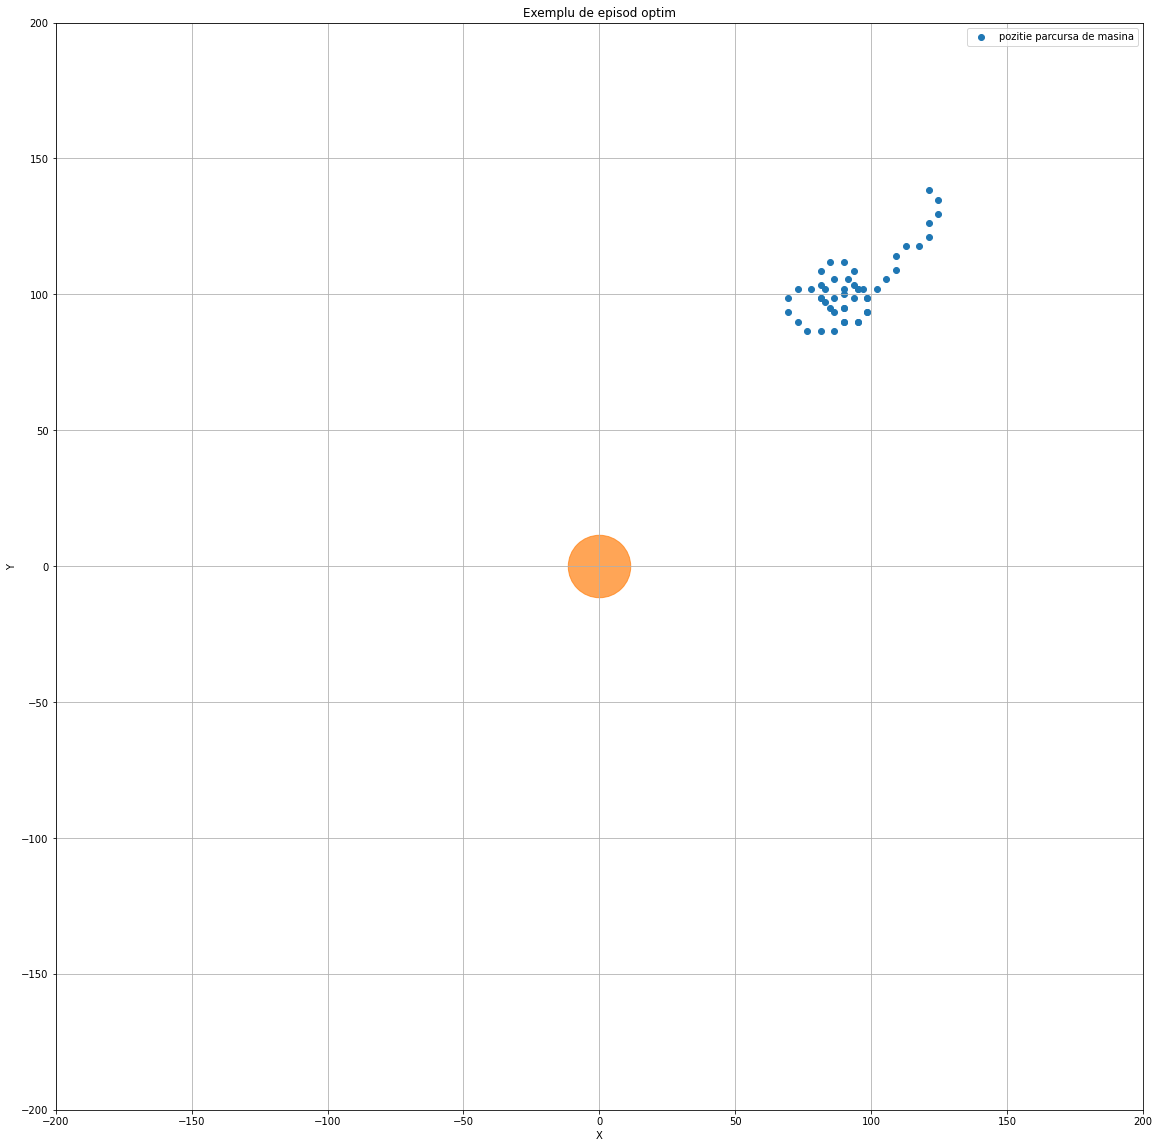

Elapsed 7.381 seconds. Eps: 250. Average Time: 6.314 seconds. Average Reward: -75.534. Max Reward: 63.000 Time: 11:12:49


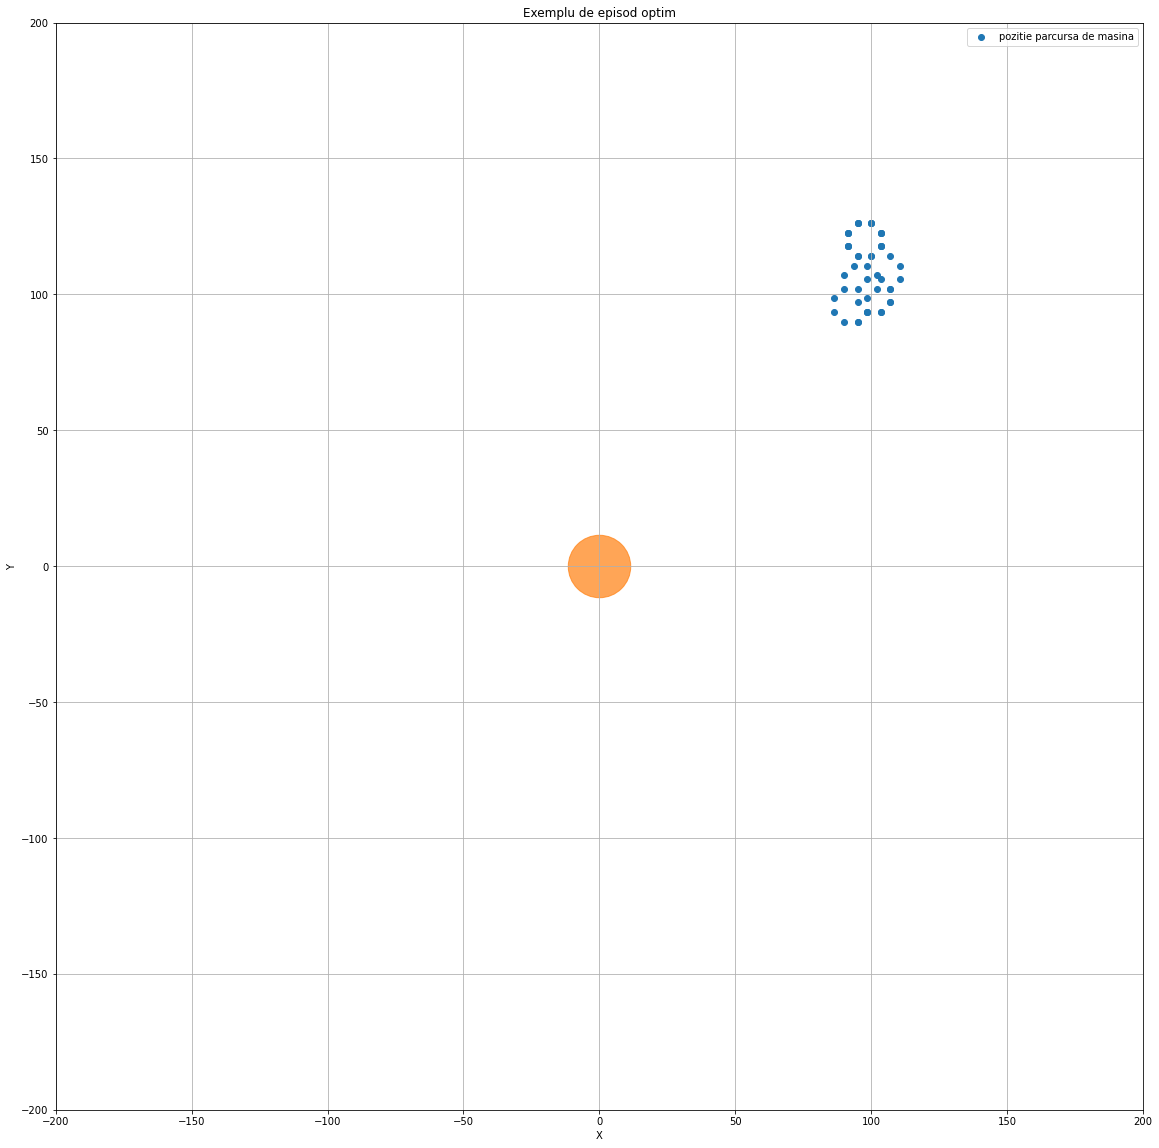

Elapsed 7.535 seconds. Eps: 300. Average Time: 6.471 seconds. Average Reward: -71.841. Max Reward: 63.000 Time: 11:18:52


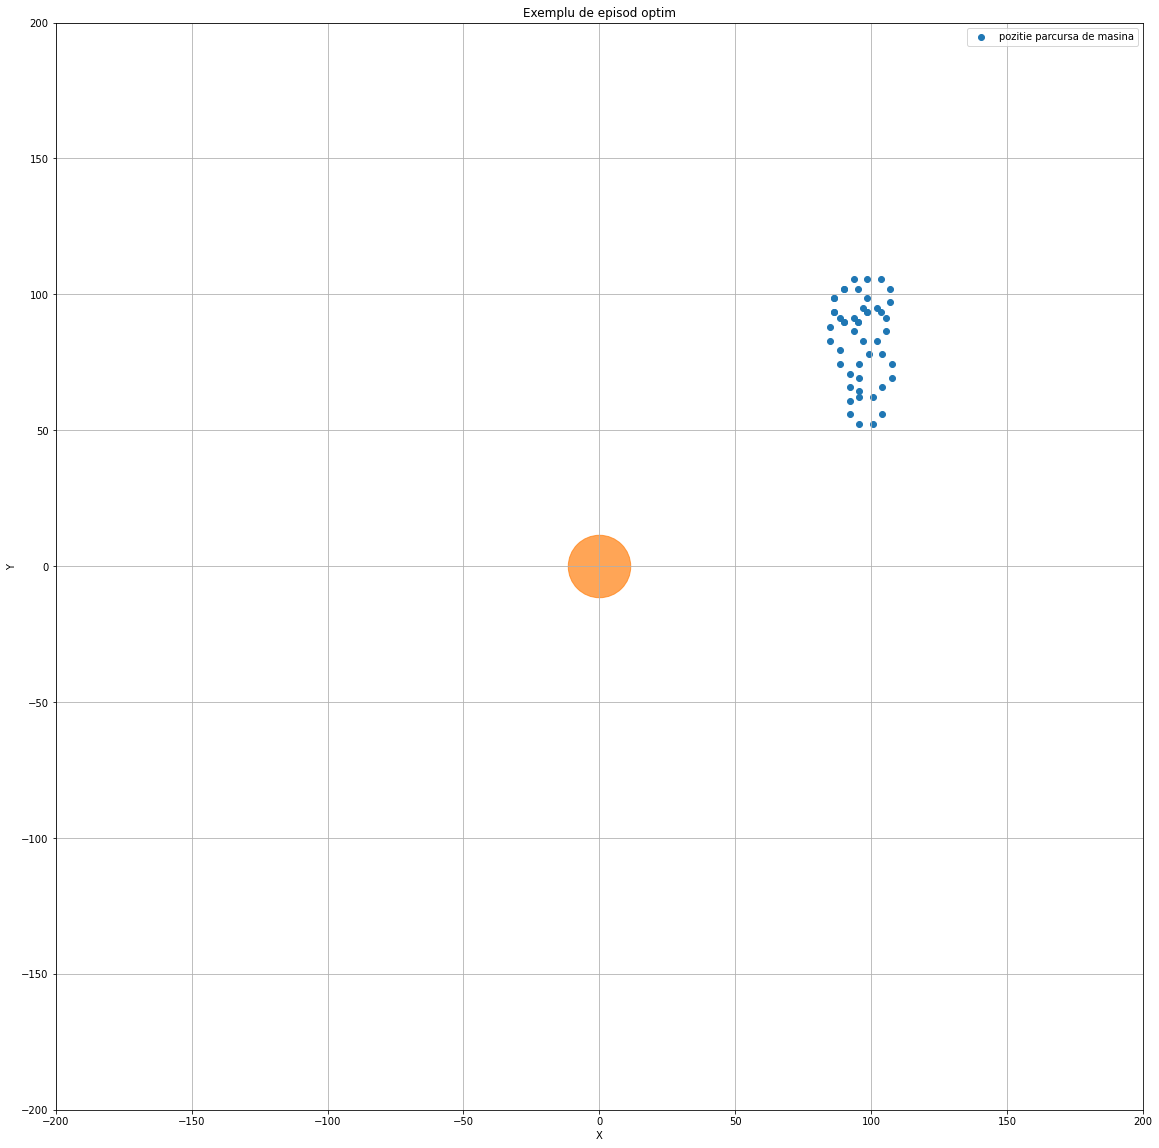

Elapsed 8.087 seconds. Eps: 350. Average Time: 6.623 seconds. Average Reward: -71.071. Max Reward: 63.000 Time: 11:25:09


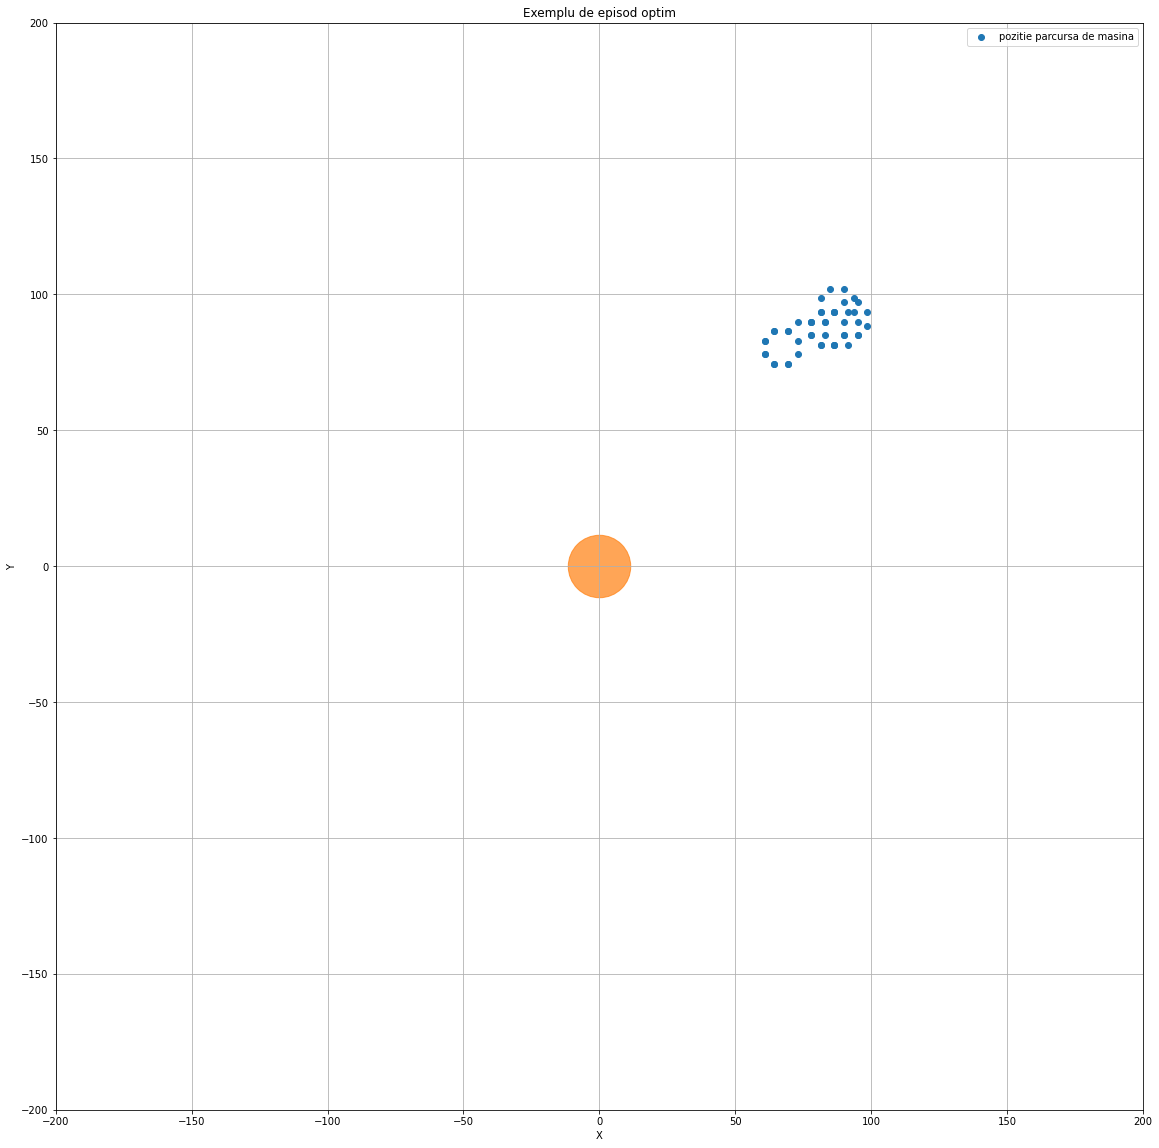

Elapsed 7.953 seconds. Eps: 400. Average Time: 6.783 seconds. Average Reward: -68.835. Max Reward: 63.000 Time: 11:31:45


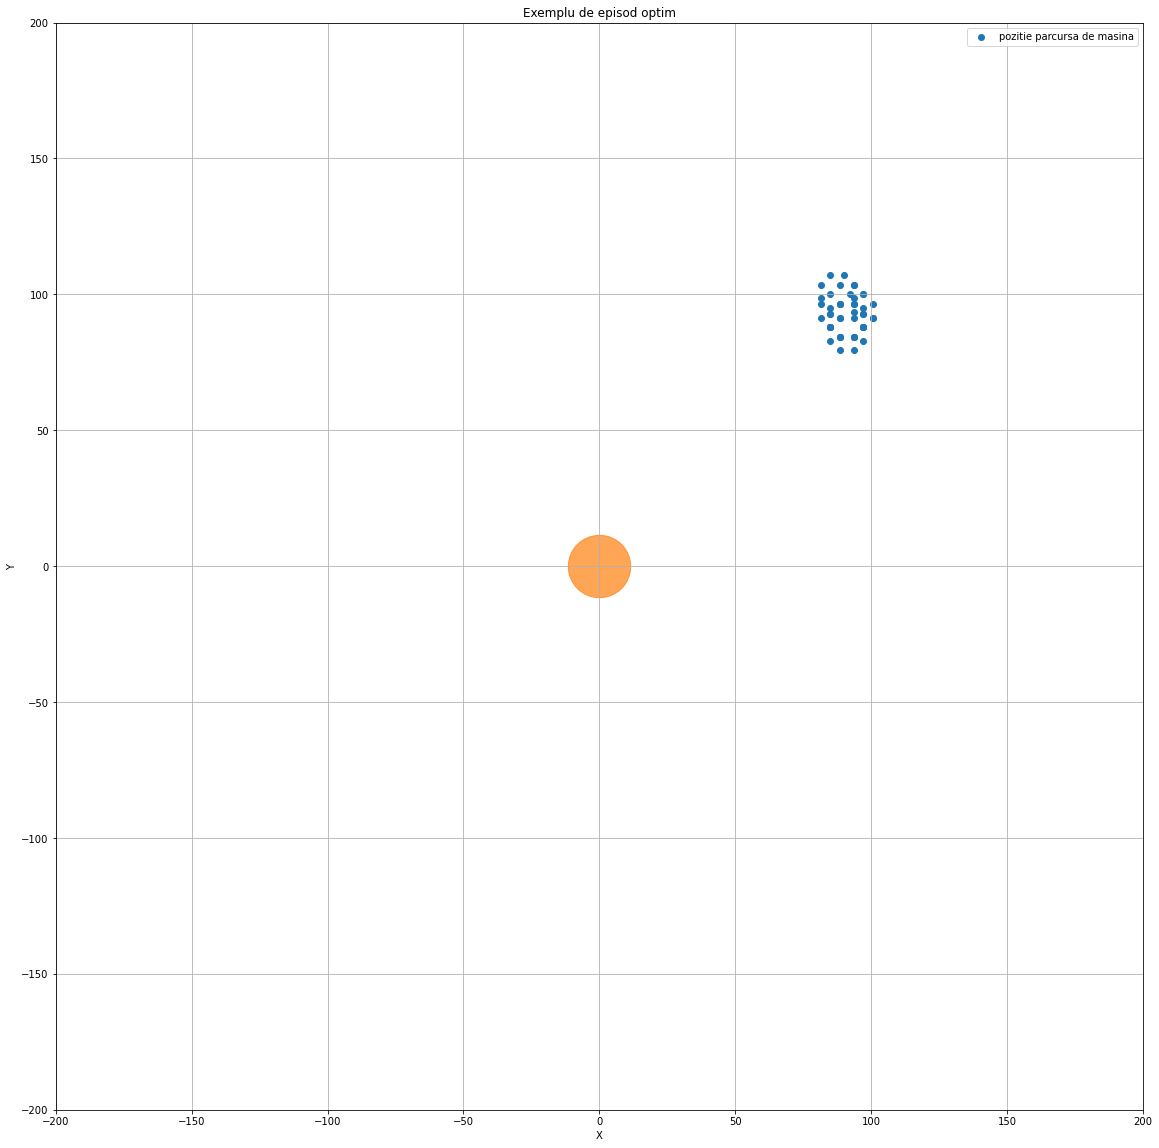

Elapsed 7.299 seconds. Eps: 450. Average Time: 6.868 seconds. Average Reward: -67.133. Max Reward: 63.000 Time: 11:38:03


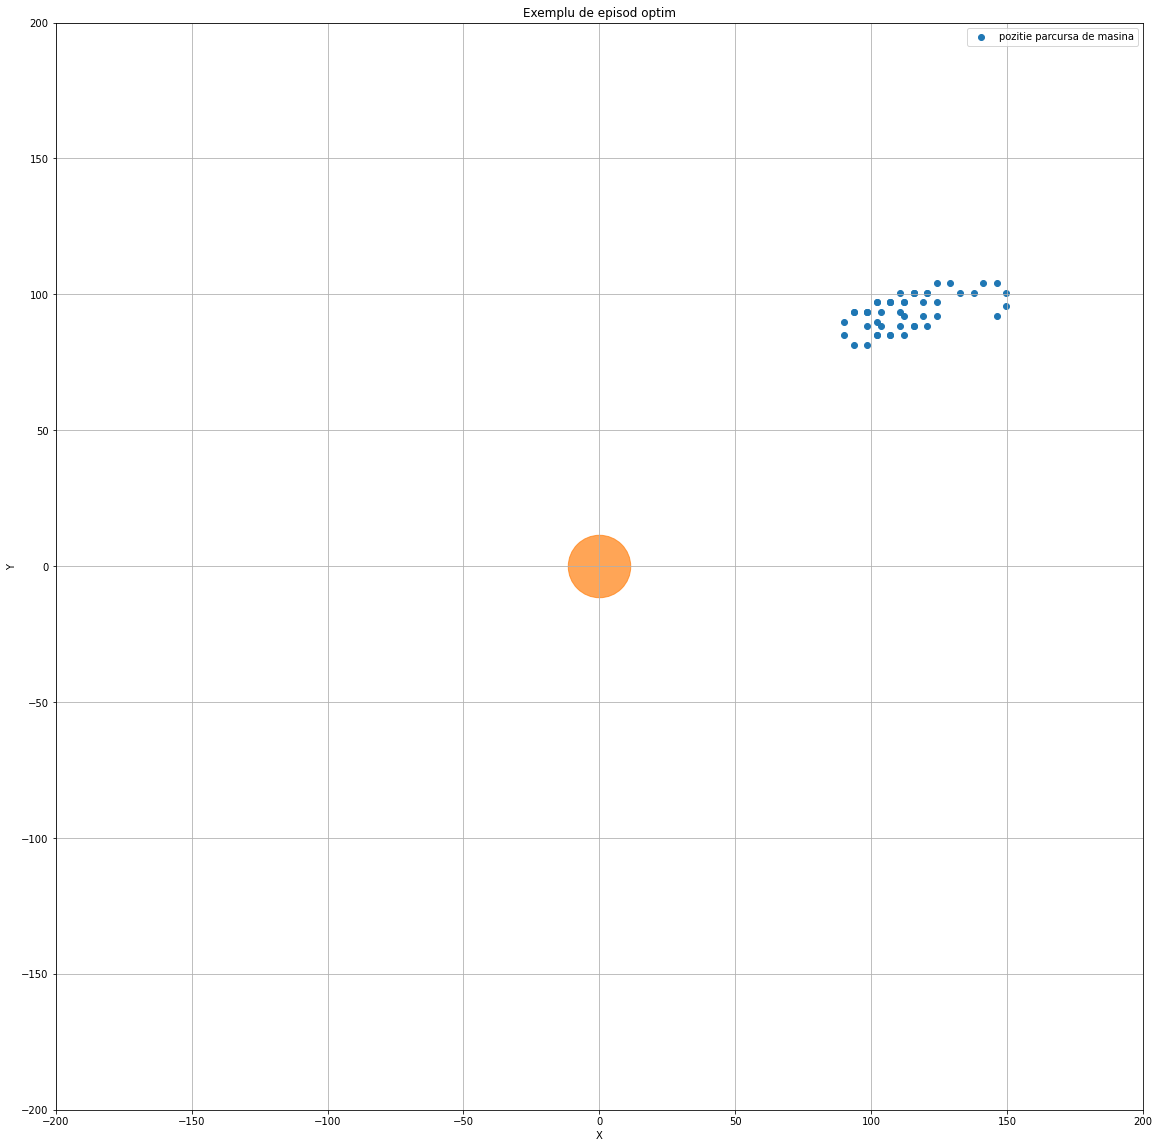

Elapsed 8.562 seconds. Eps: 500. Average Time: 7.036 seconds. Average Reward: -65.816. Max Reward: 63.000 Time: 11:45:12


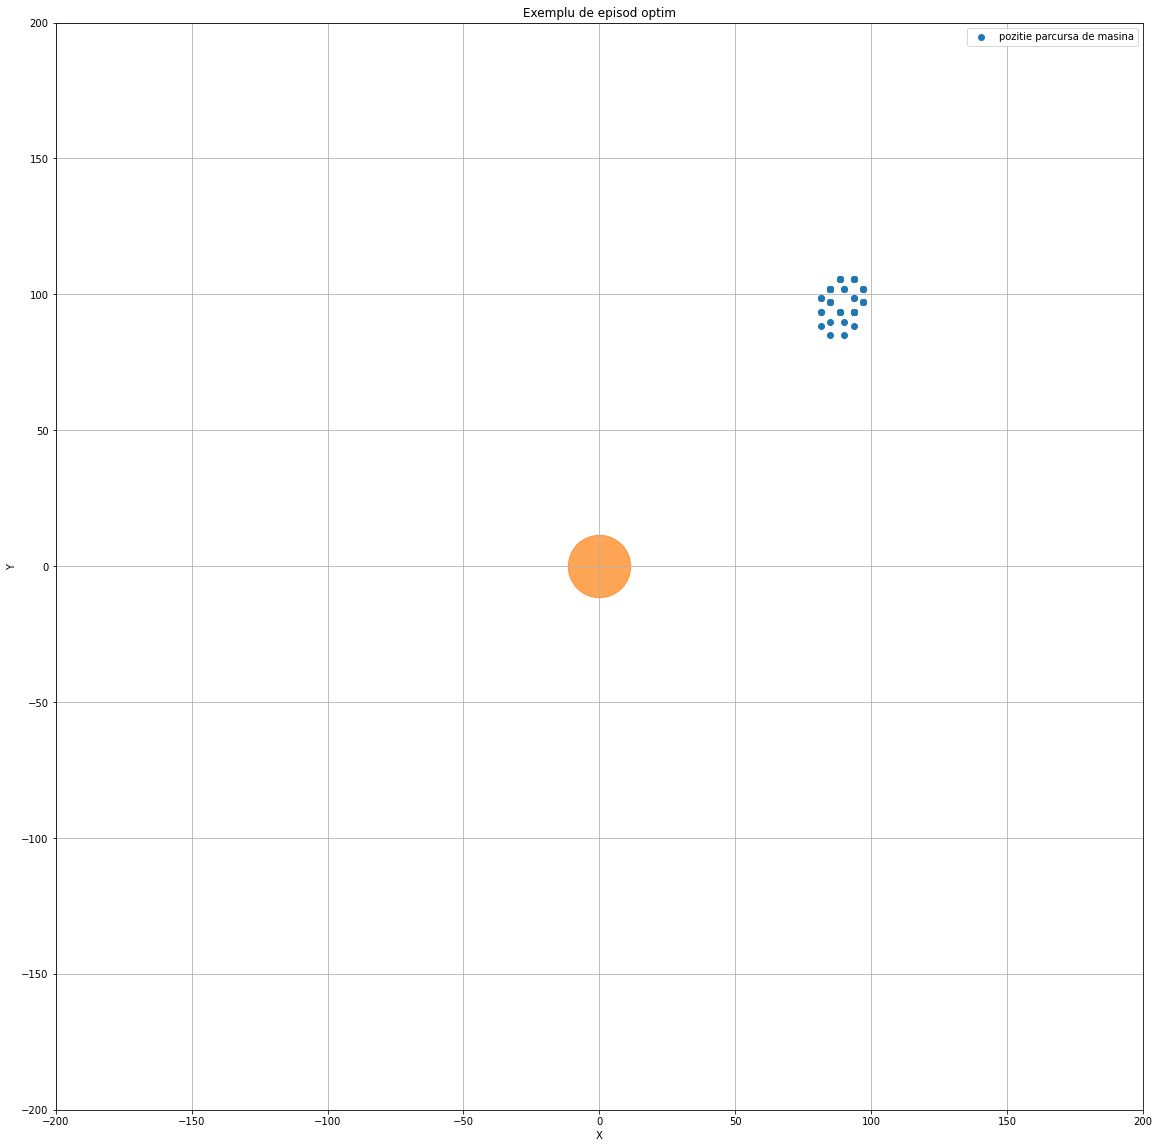

Elapsed 8.625 seconds. Eps: 550. Average Time: 7.143 seconds. Average Reward: -65.245. Max Reward: 63.000 Time: 11:52:03


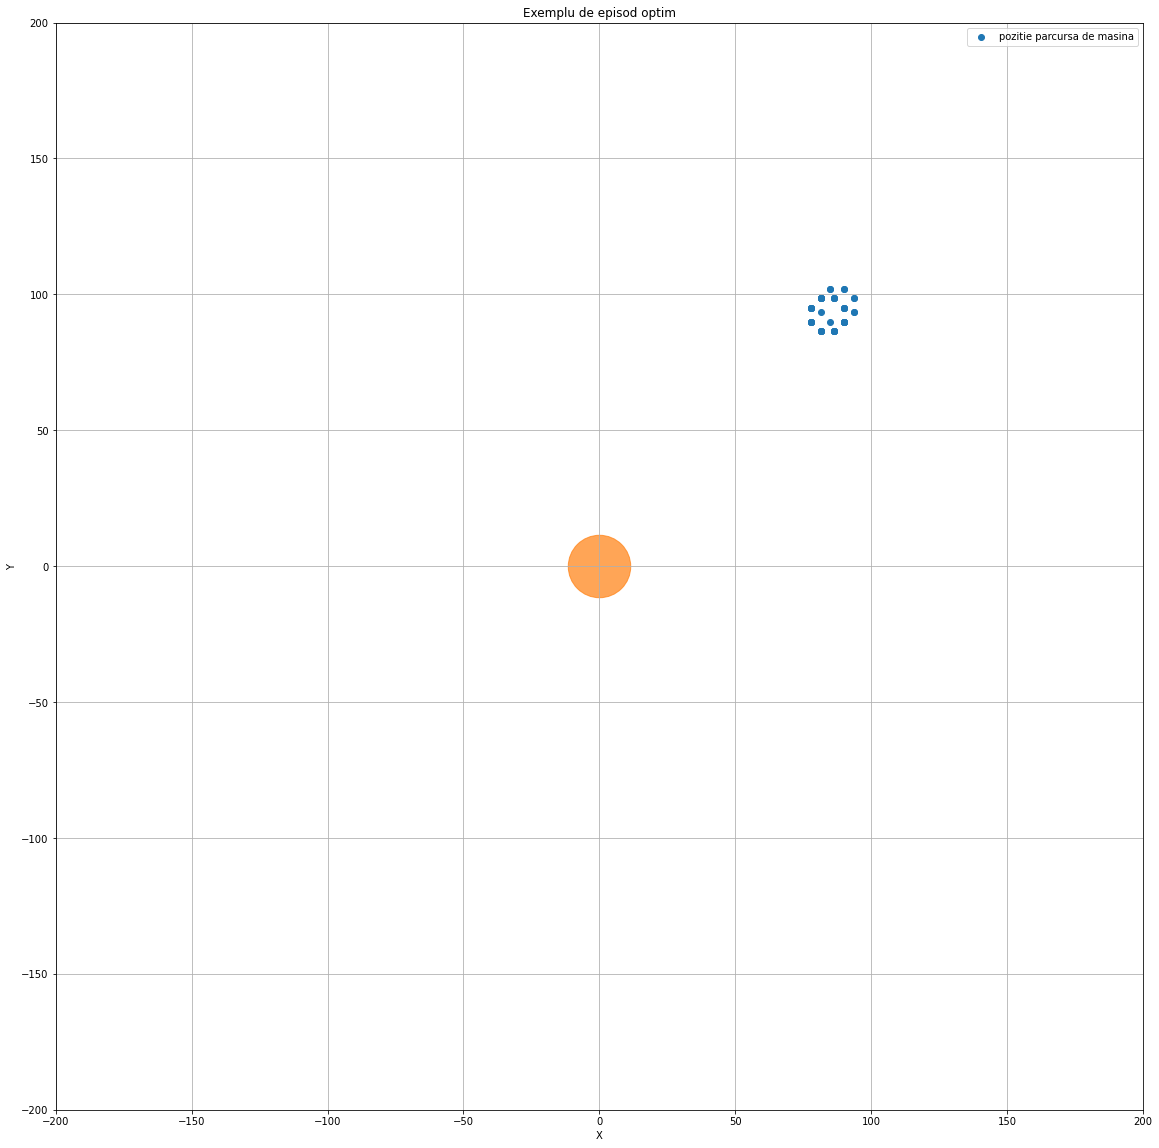

Elapsed 7.875 seconds. Eps: 600. Average Time: 7.333 seconds. Average Reward: -64.141. Max Reward: 63.000 Time: 11:59:55


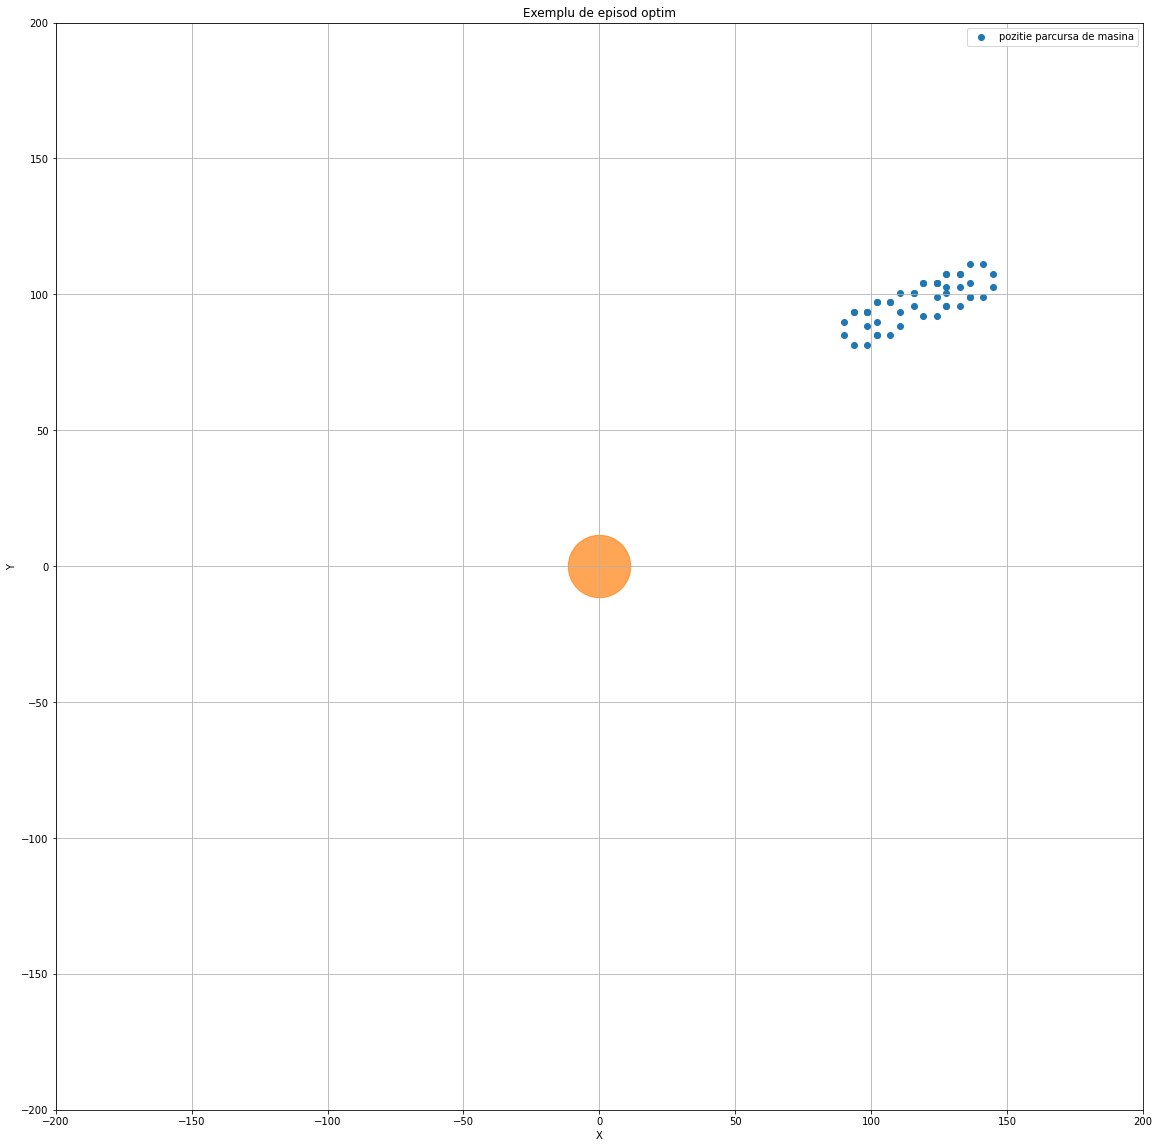

Elapsed 9.555 seconds. Eps: 650. Average Time: 7.434 seconds. Average Reward: -63.553. Max Reward: 63.000 Time: 12:07:08


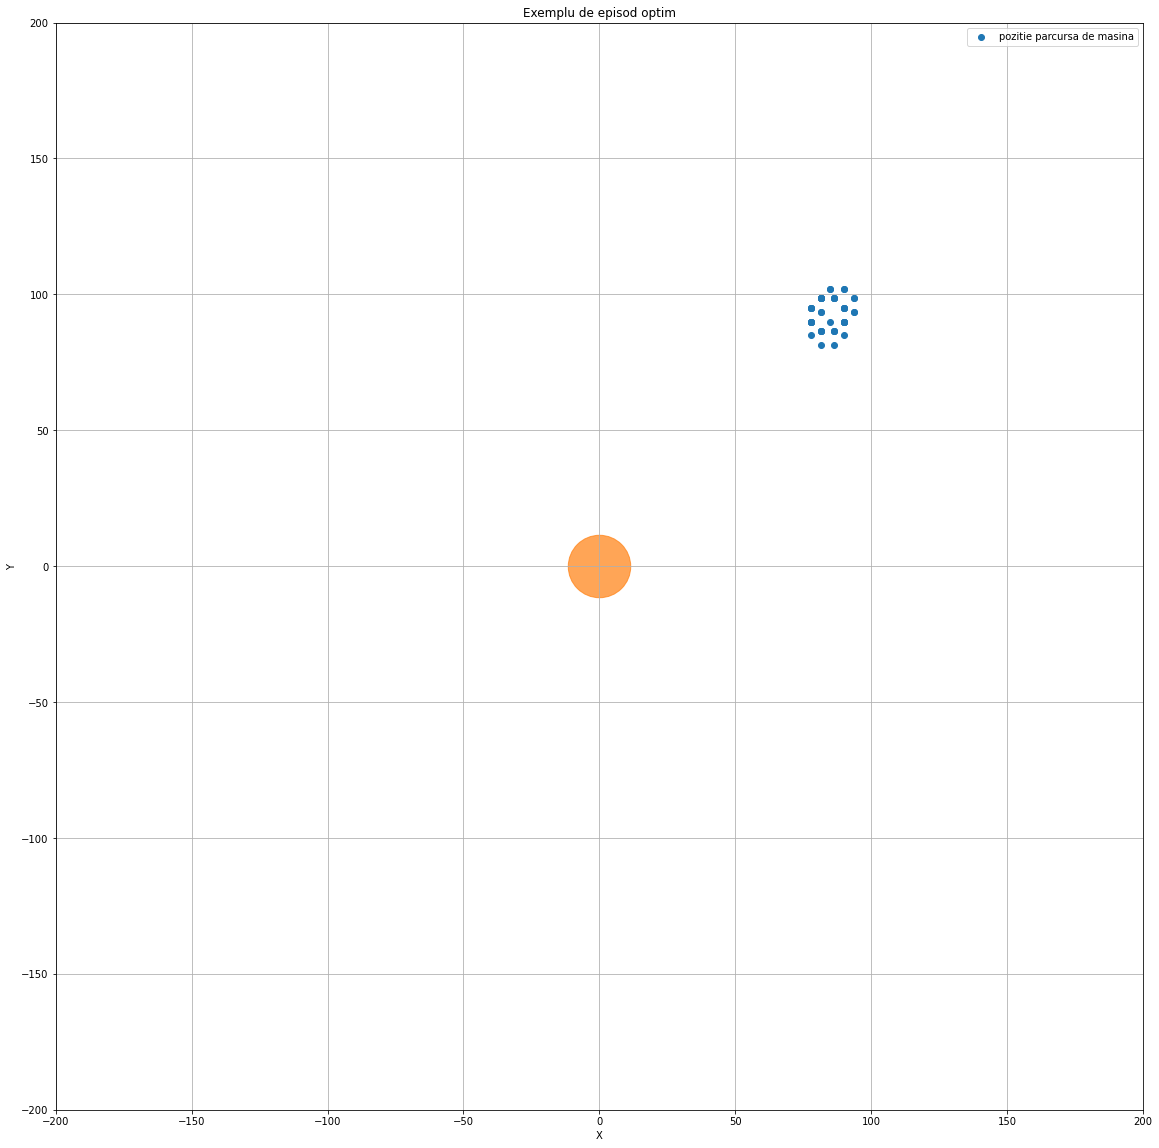

Elapsed 8.767 seconds. Eps: 700. Average Time: 7.546 seconds. Average Reward: -62.726. Max Reward: 63.000 Time: 12:14:38


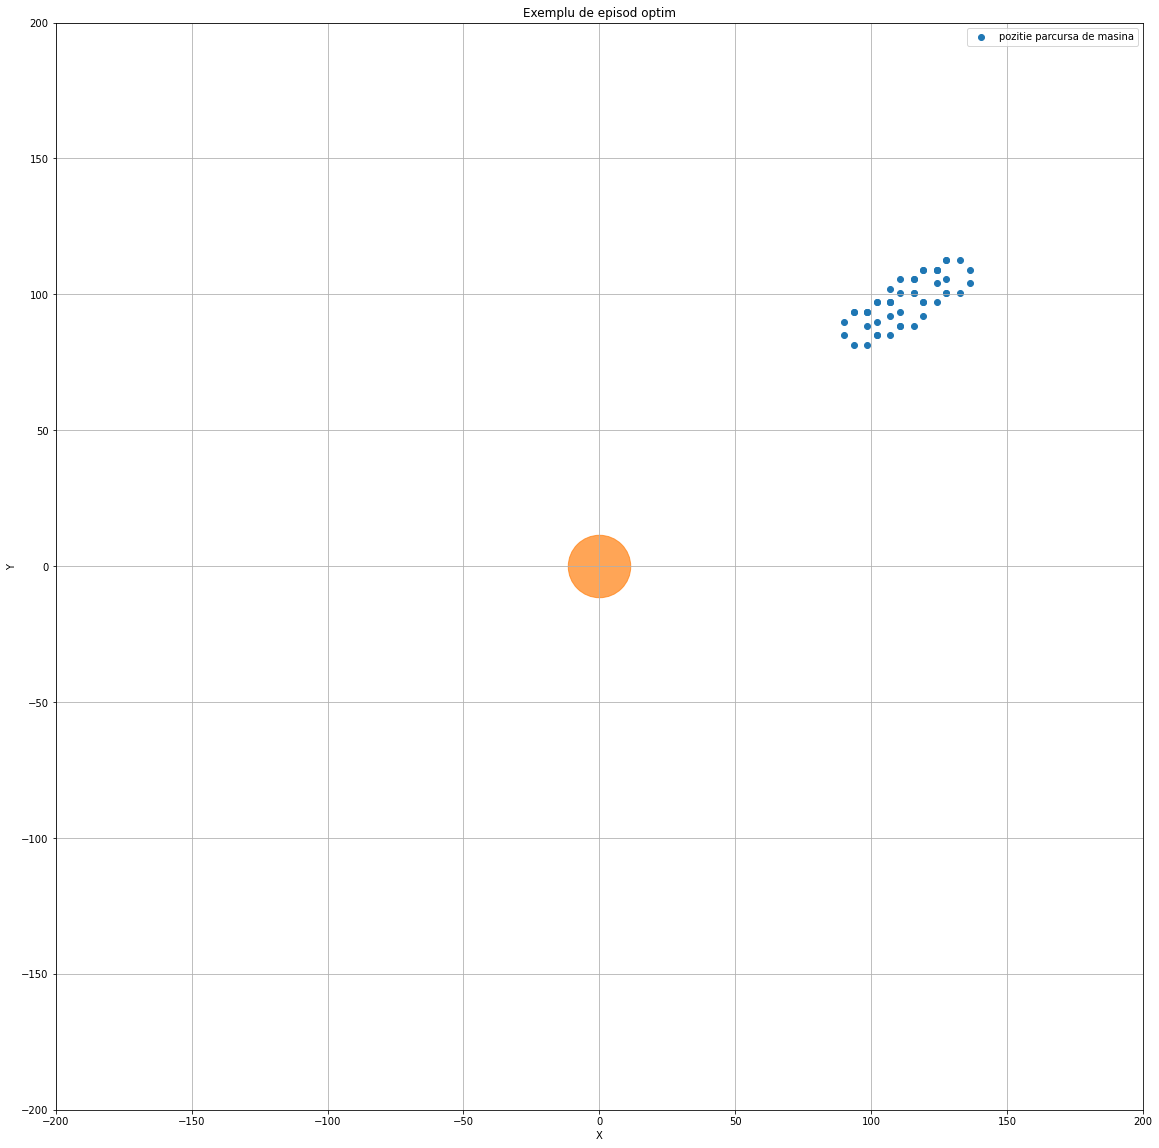

Elapsed 8.085 seconds. Eps: 750. Average Time: 7.638 seconds. Average Reward: -61.879. Max Reward: 63.000 Time: 12:22:05


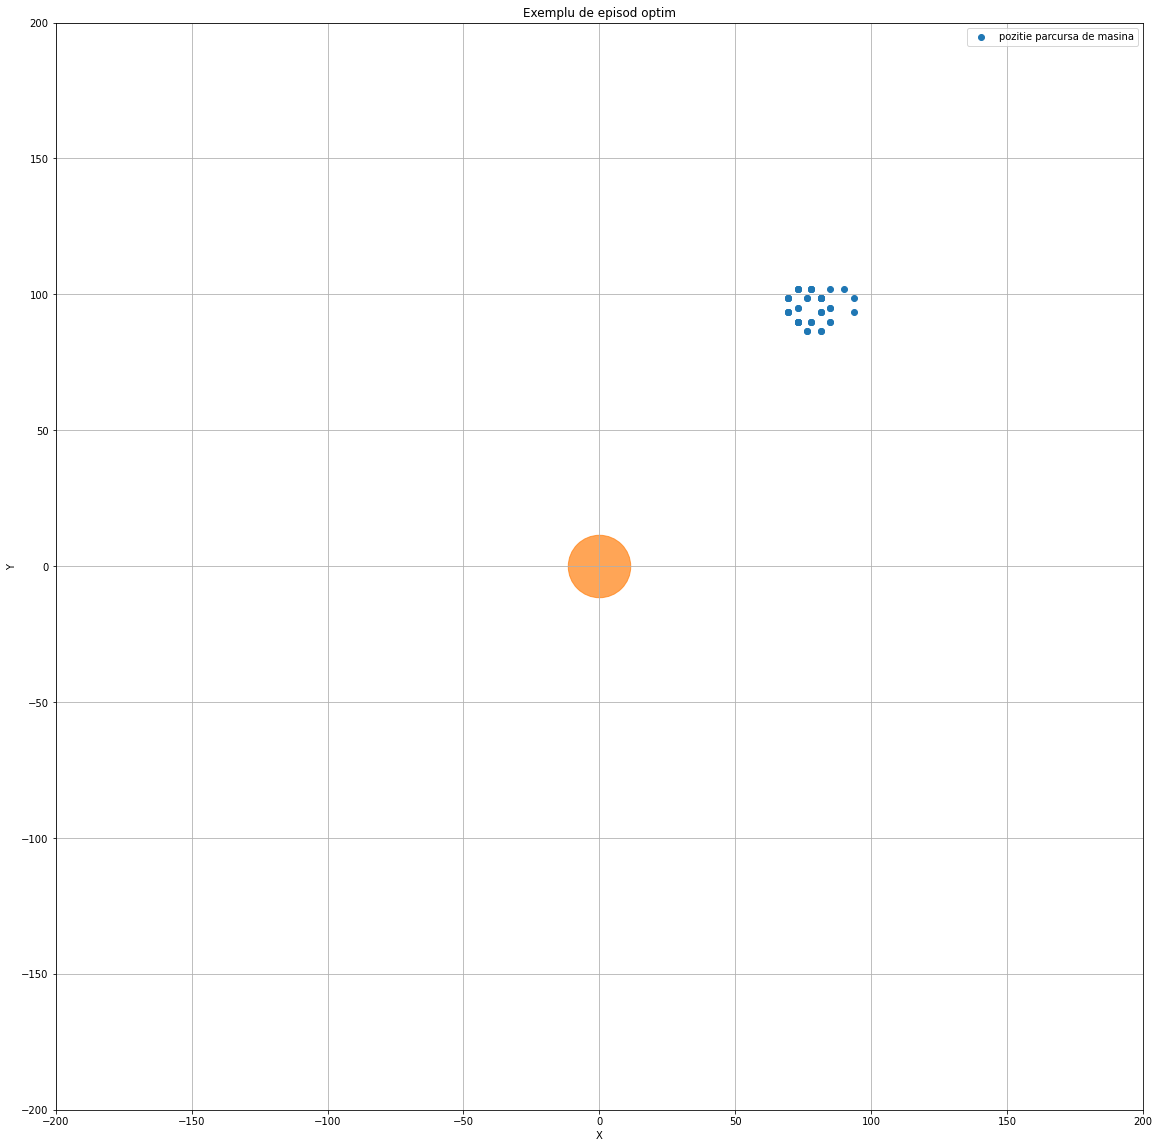

Elapsed 9.343 seconds. Eps: 800. Average Time: 7.720 seconds. Average Reward: -61.816. Max Reward: 63.000 Time: 12:29:33


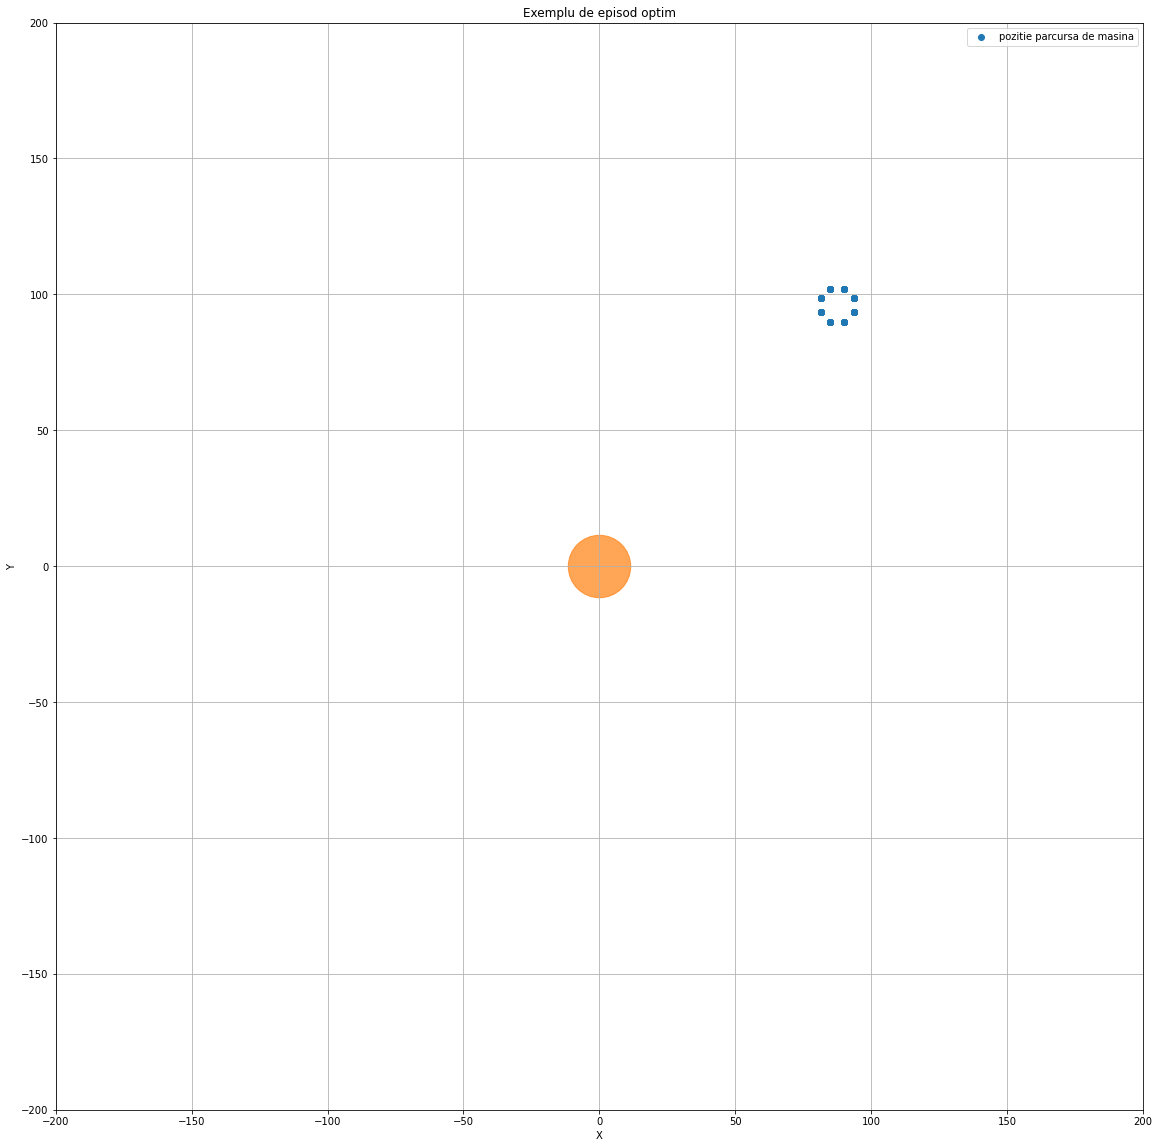

Elapsed 8.110 seconds. Eps: 850. Average Time: 7.771 seconds. Average Reward: -61.122. Max Reward: 63.000 Time: 12:36:43


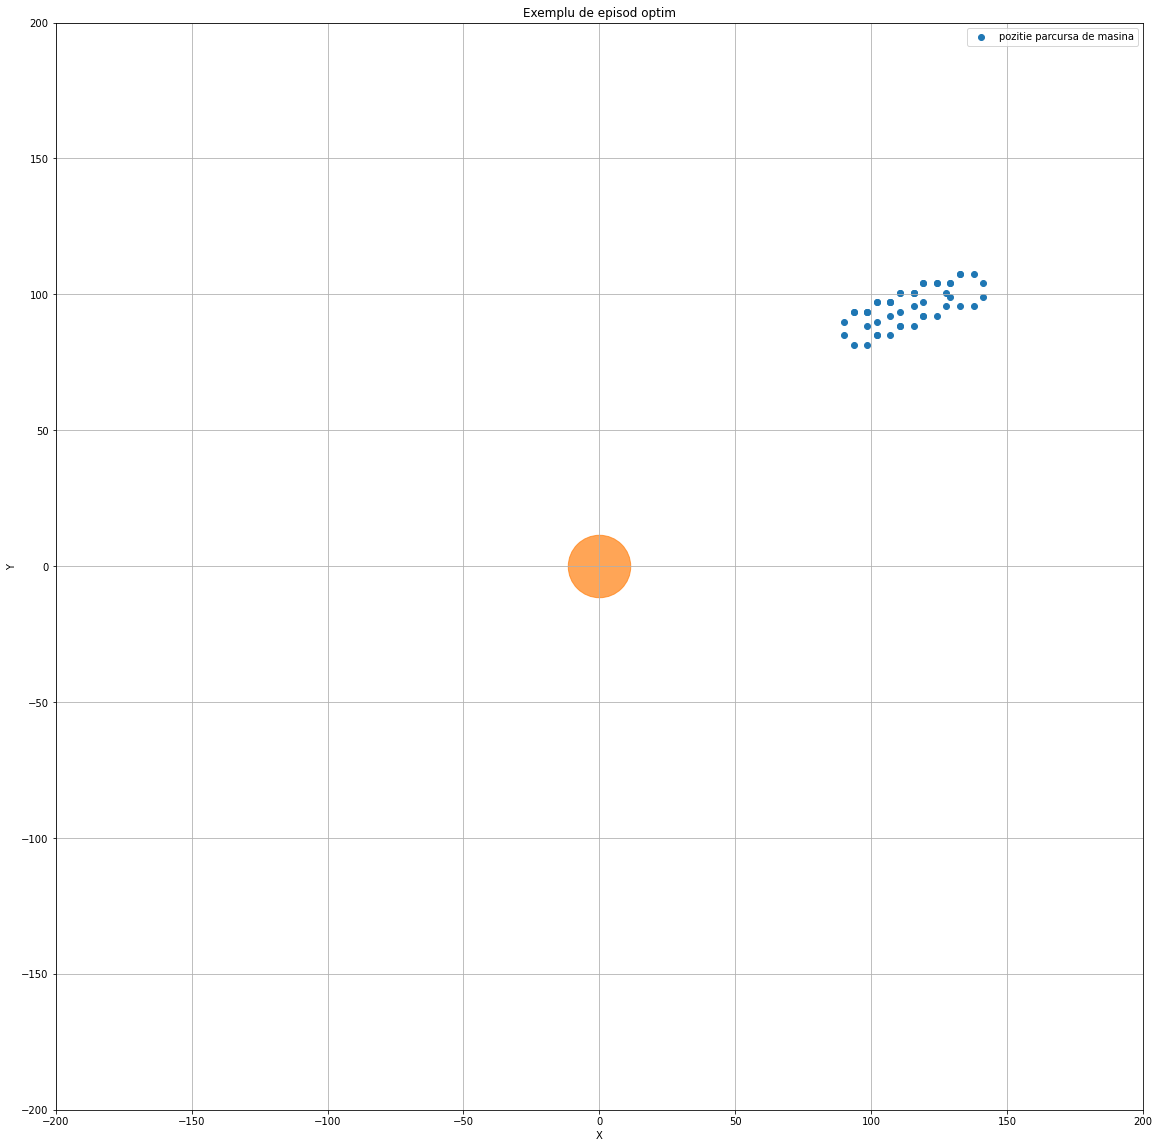

Elapsed 9.595 seconds. Eps: 900. Average Time: 7.833 seconds. Average Reward: -60.615. Max Reward: 63.000 Time: 12:44:08


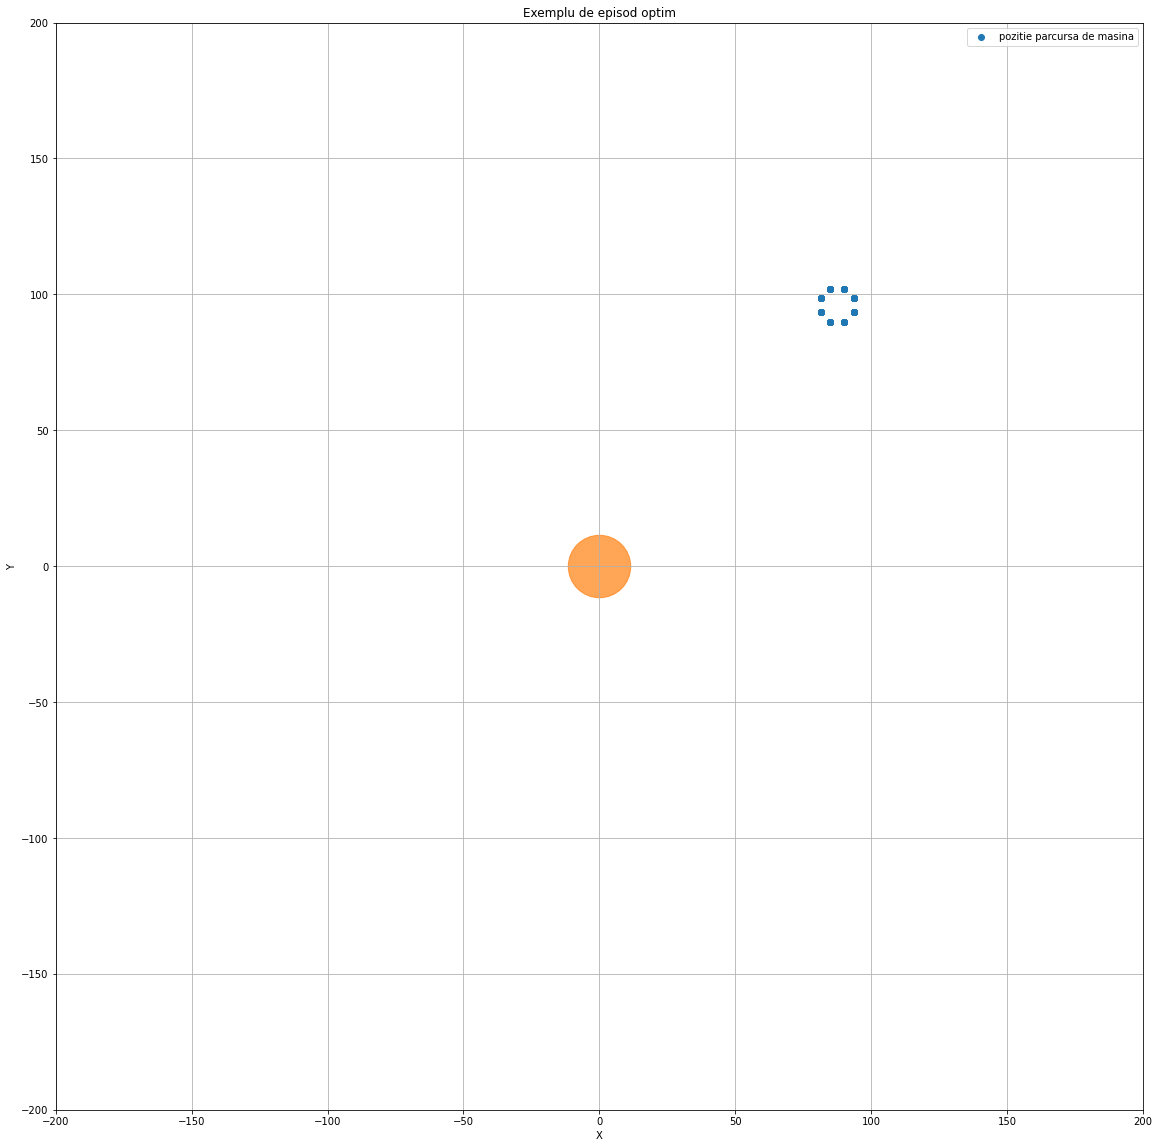

Elapsed 9.510 seconds. Eps: 950. Average Time: 7.918 seconds. Average Reward: -60.057. Max Reward: 63.000 Time: 12:52:00


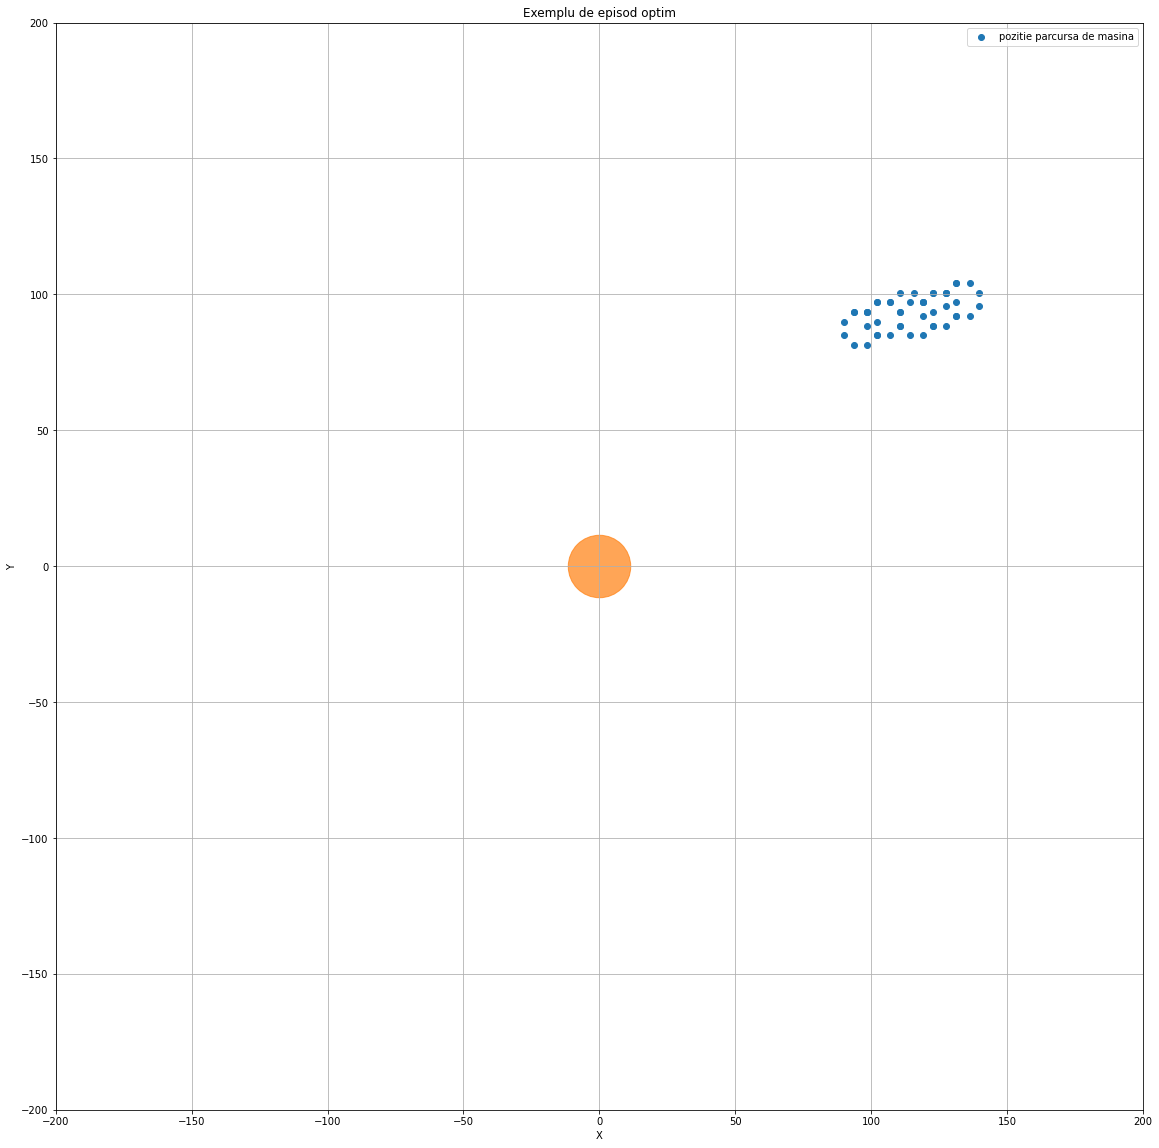

In [5]:
env = Env()
agent = DQNAgent(env.observation_space_dimension, len(env.action_space))

MAX_EPISODES = 1000
# Date pentru analizat
rewards = [] # recompensele pentru fiecare episod
best_reward = -1000 # recompensa maxima atinsa
best_agent_positions = [] # drumul parcurs de agent in episodul cu cea mai mare recompensa
training_times = []

for eps in range(MAX_EPISODES):

    state = env.reset()
    episode_reward = 0
    start = time.perf_counter()

    for training_time in range(500):
        action = agent.get_action(state)

        next_state, reward, done, info = env.step(action)

        agent.memorize(state, action, reward, next_state, done)

        state = next_state

        episode_reward += reward
        if done:
            break

    agent.replay(32)

    elapsed = time.perf_counter() - start
    training_times.append(elapsed)
    # salvez recompensa pe episodului
    rewards.append( episode_reward )

    if episode_reward > 0:
        print(f"The agent has found a solution on episode {eps}!")
        env.save_render()

    if episode_reward > best_reward:
        best_reward = episode_reward
        best_agent_positions = env.get_info()["distances"]
        
    if eps % 50 == 0:
        print('Elapsed for this episode: %.3f seconds. Eps: %d. Average Time: %.03f seconds. Average Reward: %.03f. Max Reward: %.03f Time: %s' % (elapsed, eps, np.average(training_times), np.average(rewards), np.max(rewards), time.strftime("%H:%M:%S", time.localtime())))